# Busniness Understanding

## Problem Statement

Sebuah lending company ingin membangun model yang dapat memprediksi credit risk menggunakan dataset yang disediakan oleh company yang terdiri dari data pinjaman yang diterima dan yang ditolak.

## Objective

Membangun model prediksi credit risk untuk mengklasifikasikan pelamar pinjaman sebagai kredit lancar atau kredit macet. 

## Goals

- Meningkatkan akurasi keputusan kredit

- Mengurangi risiko kredit macet

- Optimalisasi portofolio pinjaman

## Business Metrics

##### Persentase dari jumlah prediksi yang benar dari keseluruhan data (Accuracy)

Metric ini digunakan untuk mengukur seberapa baik model dalam mengklasifikasikan pinjaman sebagai lancar atau macet dan mencapai tujuan meningkatkan akurasi keputusan kredit.

# Data Collection

## Import Library

In [128]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import skew
from sklearn.model_selection import train_test_split, cross_validate, learning_curve
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from tabulate import tabulate

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, jaccard_score, log_loss, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV

import shap

import warnings 
warnings.filterwarnings('ignore')

## Load Dataset

Data yang digunakan menggunakan data Loan Dataset 2007 - 2014

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv', low_memory=False)

In [3]:
#df_dummies = df.copy()

In [4]:
# Mengatur opsi tampilan pandas untuk menampilkan semua kolom
pd.set_option('display.max_columns', None)

# Mengatur opsi tampilan pandas untuk menampilkan semua baris
#pd.set_option('display.max_rows', None)

In [5]:
df.head(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Understanding

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Berdasarkan informasi dari dataset yang diberikan, terdapat beberapa kesimpulan yang dapat diambil:

1. Dataset ini terdiri dari 466.285 baris dan 75 kolom.
2. Dataset ini terdiri dari tiga jenis tipe data utama, yaitu:
    - float64 (Tipe data untuk variabel numerik dengan desimal)
    - int64 (Tipe data untuk variabel numerik tanpa desimal)
    - object (Tipe data untuk variabel kategorikal atau teks
3. Beberapa kolom sepenuhnya tidak berisi data (seluruh nilai di kolom tersebut adalah null)
4. Terdapat beberapa kolom yang memiliki nilai yang hilang (missing values).

# Data Preparation

## Menghapus data yang tidak relevan

In [7]:
data_tidak_relevan = ['Unnamed: 0','id','member_id','url','sub_grade','zip_code']
df.drop(data_tidak_relevan, axis=1, inplace= True)

## Memeriksa data duplikat

In [8]:
jumlah_duplikat = df.duplicated().sum()

print("Jumlah total data duplikat:", jumlah_duplikat)

Jumlah total data duplikat: 0


Karena jumlah_duplikat adalah 0, maka tidak ada data yang duplikat.

## Identifikasi Kolom dengan Missing Values

In [9]:
# Melihat persentase missing values pada setiap kolom
(df.isna().mean()*100).sort_values(ascending=False).head(25)

inq_last_12m                   100.000000
open_il_6m                     100.000000
open_il_24m                    100.000000
annual_inc_joint               100.000000
mths_since_rcnt_il             100.000000
total_bal_il                   100.000000
il_util                        100.000000
open_rv_12m                    100.000000
open_rv_24m                    100.000000
dti_joint                      100.000000
verification_status_joint      100.000000
max_bal_bc                     100.000000
all_util                       100.000000
open_acc_6m                    100.000000
inq_fi                         100.000000
total_cu_tl                    100.000000
open_il_12m                    100.000000
mths_since_last_record          86.566585
mths_since_last_major_derog     78.773926
desc                            72.981546
mths_since_last_delinq          53.690554
next_pymnt_d                    48.728567
tot_cur_bal                     15.071469
total_rev_hi_lim                15

Sebagian besar kolom memiliki persentase missing values yang tinggi, bahkan mencapai 100%. Kolom-kolom ini sepenuhnya atau hampir seluruhnya terdiri dari nilai yang hilang, sehingga tidak memberikan informasi yang berguna untuk analisis atau model.

Berdasarkan pertimbangan untuk masing-masing kolom, maka semua kolom dengan persentase lebih dari 40% missing values, sebaiknya dihapus dari dataset karena tidak memberikan kontribusi yang signifikan untuk analisis atau model prediksi kredit.

In [10]:
# Menampilkan kolom dengan missing value lebih dari 40%
threshold = 0.4  # Persentase threshold (40%)
col_to_drop = df.columns[df.isna().mean() > threshold]
col_to_drop

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'inq_fi', 'total_cu_tl', 'inq_last_12m'],
      dtype='object')

In [11]:
# Menghapus kolom dengan missing value lebih dari 40%
df.drop(col_to_drop, axis = 1, inplace = True)

# Menampilkan hasil
print("Jumlah kolom setelah penghapusan:", df.shape[1])

Jumlah kolom setelah penghapusan: 47


## Melakukan Data Transformation

In [12]:
df.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-14,649.91,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN


### emp_length
Lamanya masa kerja (employment length) peminjam dalam tahun

In [13]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

Mengubah label pada kolom emp_length menjadi numerik

In [14]:
df['emp_length_int'] = df['emp_length'].str.replace('\+ years','', regex=True)
df['emp_length_int'] = df['emp_length_int'].str.replace('< 1 year',str(0))
df['emp_length_int'] = df['emp_length_int'].str.replace('n/a',str(0))
df['emp_length_int'] = df['emp_length_int'].str.replace(' years','')
df['emp_length_int'] = df['emp_length_int'].str.replace(' year','')
df['emp_length_int'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 466285 entries, 0 to 466284
Series name: emp_length_int
Non-Null Count   Dtype 
--------------   ----- 
445277 non-null  object
dtypes: object(1)
memory usage: 3.6+ MB


In [15]:
df.emp_length_int = pd.to_numeric(df.emp_length_int)
df.emp_length_int.info()

<class 'pandas.core.series.Series'>
RangeIndex: 466285 entries, 0 to 466284
Series name: emp_length_int
Non-Null Count   Dtype  
--------------   -----  
445277 non-null  float64
dtypes: float64(1)
memory usage: 3.6 MB


Hapus variabel sebelumnya

In [16]:
df.drop(['emp_length'], axis=1, inplace=True)

### issue_d
Berisi informasi tentang tanggal penerbitan pinjaman atau kredit.

In [17]:
df.issue_d.head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [18]:
df['issue_d'] = pd.to_datetime(df.issue_d,format='%b-%y')
df.issue_d.head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

Membuat kolom baru dengan nama "months_since_issue_d" yang menunjukkan jumlah bulan sejak tanggal terawal catatan kredit peminjam hingga tanggal tertentu (1 Juli 2023).

Dengan menghitung selisih waktu (timedelta) antara tanggal tertentu dan nilai dalam kolom 'issue_d'. Hasilnya kemudian diubah menjadi bentuk numerik (jumlah bulan) dan dibulatkan menjadi angka bulat.

Hal ini dilakukan untuk memberikan informasi tentang seberapa lama peminjam telah memiliki catatan kredit sejak tanggal pertama kali dibuat (issue_d). 

In [19]:
df['months_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2023-12-01') - df.issue_d)/np.timedelta64(1,'M')))

In [20]:
df['months_since_issue_d'].describe()

count    466285.000000
mean        123.255187
std          14.340154
min         108.000000
25%         113.000000
50%         119.000000
75%         129.000000
max         198.000000
Name: months_since_issue_d, dtype: float64

In [21]:
df.months_since_issue_d.min()

108.0

In [22]:
df.months_since_issue_d.max()

198.0

Hapus variabel sebelumnya

In [23]:
df.drop(['issue_d'], axis=1, inplace=True)

### earliest_cr_line
Bulan ketika jalur kredit paling awal dilaporkan oleh peminjam

In [24]:
df.earliest_cr_line.head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [25]:
df['earliest_cr_line'] = pd.to_datetime(df.earliest_cr_line,format='%b-%y')
df.earliest_cr_line.head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line, dtype: datetime64[ns]

Membuat kolom baru dengan nama "months_since_earliest_cr_line" yang menunjukkan jumlah bulan sejak tanggal terawal catatan kredit peminjam hingga tanggal tertentu (1 Juli 2023).

Dengan menghitung selisih waktu (timedelta) antara tanggal tertentu dan nilai dalam kolom 'earliest_cr_line'. Hasilnya kemudian diubah menjadi bentuk numerik (jumlah bulan) dan dibulatkan menjadi angka bulat.

Hal ini dilakukan untuk memberikan informasi tentang seberapa lama peminjam telah memiliki catatan kredit sejak tanggal pertama kali dibuat (earliest_cr_line). 

In [26]:
df['months_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2023-12-01') - df.earliest_cr_line)/np.timedelta64(1,'M')))

In [27]:
df['months_since_earliest_cr_line'].describe()

count    466256.000000
mean        311.482430
std          93.974829
min        -540.000000
25%         255.000000
50%         297.000000
75%         357.000000
max         659.000000
Name: months_since_earliest_cr_line, dtype: float64

Mengganti nilai negatif pada kolom 'mths_since_earliest_cr_line' dalam DataFrame 'df' dengan nilai maksimum dari kolom tersebut.

In [28]:
df.loc[df['months_since_earliest_cr_line'] < 0, 'months_since_earliest_cr_line'] = df['months_since_earliest_cr_line'].max()

In [29]:
min(df['months_since_earliest_cr_line'])

145.0

In [30]:
df.months_since_earliest_cr_line.max()

659.0

Hapus variabel sebelumnya

In [31]:
df.drop(['earliest_cr_line'], axis=1, inplace=True)

### last_pymnt_d
Mengindikasikan tanggal terakhir pembayaran yang dilakukan oleh peminjam.

In [32]:
df.last_pymnt_d.head()

0    Jan-15
1    Apr-13
2    Jun-14
3    Jan-15
4    Jan-16
Name: last_pymnt_d, dtype: object

In [33]:
df['last_pymnt_d'] = pd.to_datetime(df.last_pymnt_d,format='%b-%y')
df.last_pymnt_d.head()

0   2015-01-01
1   2013-04-01
2   2014-06-01
3   2015-01-01
4   2016-01-01
Name: last_pymnt_d, dtype: datetime64[ns]

Membuat kolom baru dengan nama "months_since_last_pymnt_d" yang menunjukkan jumlah bulan sejak tanggal terawal catatan kredit peminjam hingga tanggal tertentu (1 Juli 2023).

Dengan menghitung selisih waktu (timedelta) antara tanggal tertentu dan nilai dalam kolom 'last_pymnt_d'. Hasilnya kemudian diubah menjadi bentuk numerik (jumlah bulan) dan dibulatkan menjadi angka bulat.

Hal ini dilakukan untuk memberikan informasi tentang seberapa lama peminjam telah memiliki catatan kredit sejak tanggal pertama kali dibuat (last_pymnt_d). 

In [34]:
df['months_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2023-12-01') - df.last_pymnt_d)/np.timedelta64(1,'M')))

In [35]:
df['months_since_last_pymnt_d'].describe()

count    465909.000000
mean        103.294369
std          12.809898
min          95.000000
25%          95.000000
50%          96.000000
75%         107.000000
max         192.000000
Name: months_since_last_pymnt_d, dtype: float64

In [36]:
df.months_since_last_pymnt_d.min()

95.0

In [37]:
df.months_since_last_pymnt_d.max()

192.0

Hapus variabel sebelumnya

In [38]:
df.drop(['last_pymnt_d'], axis=1, inplace=True)

### last_credit_pull_d
Menyimpan informasi tentang tanggal terakhir kali data kredit peminjam diperbarui oleh pihak lain, seperti kreditur atau lembaga kredit.

In [39]:
df.last_credit_pull_d.head()

0    Jan-16
1    Sep-13
2    Jan-16
3    Jan-15
4    Jan-16
Name: last_credit_pull_d, dtype: object

In [40]:
df['last_credit_pull_d'] = pd.to_datetime(df.last_credit_pull_d,format='%b-%y')
df.last_credit_pull_d.head()

0   2016-01-01
1   2013-09-01
2   2016-01-01
3   2015-01-01
4   2016-01-01
Name: last_credit_pull_d, dtype: datetime64[ns]

Membuat kolom baru dengan nama "months_since_last_credit_pull_d" yang menunjukkan jumlah bulan sejak tanggal terawal catatan kredit peminjam hingga tanggal tertentu (1 Juli 2023).

Dengan menghitung selisih waktu (timedelta) antara tanggal tertentu dan nilai dalam kolom 'last_credit_pull_d'. Hasilnya kemudian diubah menjadi bentuk numerik (jumlah bulan) dan dibulatkan menjadi angka bulat.

Hal ini dilakukan untuk memberikan informasi tentang seberapa lama peminjam telah memiliki catatan kredit sejak tanggal pertama kali dibuat (last_credit_pull_d). 

In [41]:
df['months_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2023-12-01') - df.last_credit_pull_d)/np.timedelta64(1,'M')))

In [42]:
df['months_since_last_credit_pull_d'].describe()

count    466243.000000
mean         99.045588
std           9.636423
min          95.000000
25%          95.000000
50%          95.000000
75%          97.000000
max         199.000000
Name: months_since_last_credit_pull_d, dtype: float64

In [43]:
df.months_since_last_credit_pull_d.min()

95.0

In [44]:
df.months_since_last_credit_pull_d.max()

199.0

Hapus variabel sebelumnya

In [45]:
df.drop(['last_credit_pull_d'], axis=1, inplace=True)

### loan_status

Terdapat beberapa nilai dalam kolom 'loan_status' yang memiliki arti yang sama atau serupa dan ingin digabungkan menjadi satu kategori yang lebih umum. 

1. 'Does not meet the credit policy. Status:Fully Paid' memiliki arti "Sesuai dengan kebijakan kredit dan telah dilunasi sepenuhnya".
2. 'Charged Off' memiliki arti "Tidak dapat melunasi kredit dan dianggap gagal bayar".
3. 'Late (31-120 days)' memiliki arti "Terlambat membayar selama 31-120 hari".
4. 'In Grace Period' memiliki arti "Masih dalam masa tenggang pembayaran".
5. 'Does not meet the credit policy. Status:Charged Off' memiliki arti "Tidak sesuai dengan kebijakan kredit dan dianggap gagal bayar".

Mengganti beberapa nilai yang memiliki arti serupa dengan nilai yang lebih umum, yaitu 'Fully Paid' untuk yang telah dilunasi sepenuhnya dan 'Default' untuk yang dianggap gagal bayar.

Kemudian, melakukan penghapusan baris dengan nilai 'Current' dan 'Late (16-30 days)' dari kolom 'loan_status' menggunakan df.drop(). Karena dalam analisis kredit risk modeling, akan melakukan memprediksi kemungkinan gagal bayar (default) atau pelunasan (fully paid) kredit.

In [46]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [47]:
df['loan_status'].replace({'Does not meet the credit policy. Status:Fully Paid':'Fully Paid',
                           'Charged Off':'Default',
                           'Late (31-120 days)':'Default',
                           'In Grace Period':'Default',
                           'Does not meet the credit policy. Status:Charged Off':'Default'},inplace=True)

In [48]:
# Menghapus baris dengan nilai 'Current' dan 'Late (16-30 days)' dari kolom 'loan_status'
df.drop(df[df['loan_status'].isin(['Current', 'Late (16-30 days)'])].index, inplace=True)

In [49]:
df['loan_status'].unique()

array(['Fully Paid', 'Default'], dtype=object)

## Membagi data numerik dan data kategorik

In [50]:
# Identifikasi kolom kategorikal dan numerik
col_kat = [col for col in df.columns if df[col].dtype == 'object']
col_num = [col for col in df.columns if df[col].dtype != 'object']

In [51]:
# Menampilkan jumlah unique values pada variabel kategorikal
for i in col_kat:
    unique_vals = df[i].nunique()
    print(f"Jumlah unique values pada variabel {i} adalah {unique_vals}")

print('')

# Menampilkan jumlah unique values pada variabel numerik
for j in col_num:
    unique_vals = df[j].nunique()
    print(f"Jumlah unique values pada variabel {j} adalah {unique_vals}")

Jumlah unique values pada variabel term adalah 2
Jumlah unique values pada variabel grade adalah 7
Jumlah unique values pada variabel emp_title adalah 130713
Jumlah unique values pada variabel home_ownership adalah 6
Jumlah unique values pada variabel verification_status adalah 3
Jumlah unique values pada variabel loan_status adalah 2
Jumlah unique values pada variabel pymnt_plan adalah 2
Jumlah unique values pada variabel purpose adalah 14
Jumlah unique values pada variabel title adalah 50076
Jumlah unique values pada variabel addr_state adalah 50
Jumlah unique values pada variabel initial_list_status adalah 2
Jumlah unique values pada variabel application_type adalah 1

Jumlah unique values pada variabel loan_amnt adalah 1310
Jumlah unique values pada variabel funded_amnt adalah 1313
Jumlah unique values pada variabel funded_amnt_inv adalah 9563
Jumlah unique values pada variabel int_rate adalah 505
Jumlah unique values pada variabel installment adalah 44028
Jumlah unique values pada

In [52]:
# Menampilkan distribusi label pada variabel kategorikal
for i in col_kat:
    label_dist = df[i].value_counts()
    print(f"Distribusi label pada variabel {i} antara lain:\n{label_dist}")
    print('')

Distribusi label pada variabel term antara lain:
 36 months    187679
 60 months     53162
Name: term, dtype: int64

Distribusi label pada variabel grade antara lain:
B    72671
C    61583
A    39618
D    39144
E    18353
F     7457
G     2015
Name: grade, dtype: int64

Distribusi label pada variabel emp_title antara lain:
Teacher                            1669
Manager                            1627
Registered Nurse                    730
RN                                  725
Supervisor                          718
                                   ... 
Coleman Floor LLC                     1
All City Bail Bonds                   1
VAMC and Fresenius Medical Care       1
ohio turnpike commission              1
Server Engineer Lead                  1
Name: emp_title, Length: 130713, dtype: int64

Distribusi label pada variabel home_ownership antara lain:
MORTGAGE    118230
RENT        102079
OWN          20304
OTHER          179
NONE            48
ANY              1
Name: home_owne

1. Variabel "pymnt_plan" hanya memiliki 2 nilai, yaitu 'n' dan 'y', namun mayoritas (sekitar 99.998% dari data) bernilai 'n'. Karena hanya ada sedikit data yang bernilai 'y', variabel ini bisa dihapus.


2. Variabel "application_type" hanya memiliki 1 nilai, yaitu 'INDIVIDUAL'. Karena variabel ini tidak memberikan variasi informasi sama sekali, variabel ini juga bisa dihapus.


3. Variabel "policy_code" hanya memiliki satu nilai, artinya variabel tersebut tidak memberikan variasi informasi apa pun dalam dataset dan tidak memberikan kontribusi dalam membangun model prediksi credit risk. Oleh karena itu, variabel policy_code dapat dihapus karena tidak relevan dan tidak memberikan nilai tambah pada analisis atau pemodelan.


4. Variabel "title" dan "emp_title" memiliki banyak nilai unik yang cukup banyak, masing-masing sebanyak 63,099 dan 205,475. Variabel-variabel ini cenderung memberikan noise pada model dan sulit untuk diolah dengan baik, sehingga dapat dihapus.


5. Variabel "collections_12_mths_ex_med" mungkin tidak relevan dalam membangun model prediksi credit risk karena hanya mencatat jumlah koleksi (collections) selama 12 bulan terakhir, dan nilai medianya mungkin mendekati 0. Jika sebagian besar nilai pada kolom ini adalah 0, maka kolom ini tidak akan memberikan informasi yang signifikan dan dapat dihapus.


6. Variabel "acc_now_delinq" mencatat jumlah akun yang sedang terlambat pembayaran (delinquent) pada saat data dikumpulkan. Jika mayoritas akun tidak sedang terlambat pembayaran (delinquent), maka kolom ini tidak akan memberikan variasi yang cukup untuk mempengaruhi prediksi model. Oleh karena itu, kolom ini mungkin dihapus untuk mengurangi dimensi data dan meningkatkan efisiensi pemodelan.

In [53]:
df.drop(['policy_code', 'application_type', 'emp_title', 'title', 'pymnt_plan','acc_now_delinq','collections_12_mths_ex_med'],axis = 1, inplace= True)

## Mengisi Nilai yang hilang

In [54]:
# Identifikasi kolom numerik dengan missing values
numerik = df.select_dtypes(include=[np.number])
missing_numerik = numerik.columns[numerik.isnull().any()]
print("Jumlah kolom numerik dengan missing values:", len(missing_numerik))

# Identifikasi kolom kategorikal dengan missing values
kategorik = df.select_dtypes(include='object')
missing_kategorik = kategorik.columns[kategorik.isnull().any()]
print("Jumlah kolom kategorikal dengan missing values:", len(missing_kategorik))

Jumlah kolom numerik dengan missing values: 14
Jumlah kolom kategorikal dengan missing values: 0


In [55]:
df.isnull().sum().head(50)

loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
term                                   0
int_rate                               0
installment                            0
grade                                  0
home_ownership                         0
annual_inc                             4
verification_status                    0
loan_status                            0
purpose                                0
addr_state                             0
dti                                    0
delinq_2yrs                           29
inq_last_6mths                        29
open_acc                              29
pub_rec                               29
revol_bal                              0
revol_util                           233
total_acc                             29
initial_list_status                    0
out_prncp                              0
out_prncp_inv                          0
total_pymnt     

### total_rev_hi_lim
Kolom ini mencatat jumlah total kredit yang diberikan kepada peminjam dalam jumlah tertinggi pada akun revolving credit mereka.

In [56]:
df['total_rev_hi_lim'].head()

0   NaN
1   NaN
2   NaN
3   NaN
5   NaN
Name: total_rev_hi_lim, dtype: float64

In [57]:
df['total_rev_hi_lim'].fillna(df['funded_amnt'],inplace = True)

In [58]:
df['total_rev_hi_lim'].isnull().sum()

0

### annual_inc
Kolom ini mencatat jumlah pendapatan tahunan yang dilaporkan oleh peminjam dalam aplikasi pinjaman.

In [59]:
df['annual_inc'].head()

0    24000.0
1    30000.0
2    12252.0
3    49200.0
5    36000.0
Name: annual_inc, dtype: float64

In [60]:
df.annual_inc.isnull().sum()

4

In [61]:
df.annual_inc.fillna(df.annual_inc.mean(),inplace=True)

In [62]:
df.annual_inc.isnull().sum()

0

### Mengisi beberapa kolom yang masih kosong dengan nilai "0" dan Median
Dengan mengisi nilai-nilai yang hilang dengan angka 0, dapat mengasumsikan bahwa ketika nilai tidak ada, maka jumlah atau lama waktu yang dimaksud adalah nol atau tidak ada. Sementara mengisi nilai-nilai yang hilang dengan median dapat memberikan estimasi lebih stabil terhadap outlier.

In [63]:
df.loc[:,['total_acc','pub_rec','open_acc','inq_last_6mths','delinq_2yrs','months_since_earliest_cr_line','months_since_last_pymnt_d','months_since_last_credit_pull_d','revol_util','tot_coll_amt','tot_cur_bal','emp_length_int']].head(5)

,total_acc,pub_rec,open_acc,inq_last_6mths,delinq_2yrs,months_since_earliest_cr_line,months_since_last_pymnt_d,months_since_last_credit_pull_d,revol_util,tot_coll_amt,tot_cur_bal,emp_length_int
0,9.0,0.0,3.0,1.0,0.0,467.0,107.0,95.0,83.7,NaN,NaN,10.0
1,4.0,0.0,3.0,5.0,0.0,296.0,128.0,123.0,9.4,NaN,NaN,0.0
2,10.0,0.0,2.0,2.0,0.0,265.0,114.0,95.0,98.5,NaN,NaN,10.0
3,37.0,0.0,10.0,1.0,0.0,334.0,107.0,107.0,21.0,NaN,NaN,10.0
5,12.0,0.0,9.0,3.0,0.0,229.0,107.0,99.0,28.3,NaN,NaN,3.0


In [64]:
# Mencari apakah ada angka "0" dari kolom-kolom tersebut
cols = ['total_acc', 'pub_rec', 'open_acc', 'inq_last_6mths', 'delinq_2yrs', 'months_since_earliest_cr_line', 'months_since_last_pymnt_d', 'months_since_last_credit_pull_d', 'revol_util', 'tot_coll_amt', 'tot_cur_bal', 'emp_length_int']
is_zero_in_cols = (df[cols] == 0).any()

# Menampilkan hasil
print(is_zero_in_cols)

total_acc                          False
pub_rec                             True
open_acc                            True
inq_last_6mths                      True
delinq_2yrs                         True
months_since_earliest_cr_line      False
months_since_last_pymnt_d          False
months_since_last_credit_pull_d    False
revol_util                          True
tot_coll_amt                        True
tot_cur_bal                         True
emp_length_int                      True
dtype: bool


- Semua kolom yang memiliki nilai "0" akan mengisi nilai kosong dari kolom tersebut dengan nilai "0".


- Kolom total_acc adalah salah satu kolom yang mengandung informasi tentang total jumlah akun kredit yang dimiliki oleh peminjam. Dalam hal ini, mengisi nilai kosong dengan "0" adalah pilihan yang masuk akal, karena "0" mengindikasikan bahwa tidak ada akun kredit.


- Kolom-kolom 'months_since_earliest_cr_line', 'months_since_last_pymnt_d', dan 'months_since_last_credit_pull_d' merupakan kolom yang menunjukkan jumlah bulan sejak tanggal tertentu hingga tanggal tertentu dalam konteks catatan kredit peminjam. Untuk mengganti nilai kosong pada kolom-kolom tersebut, dapat menggunakan median dari kolom tersebut sebagai nilai pengganti. Median lebih tahan terhadap pengaruh outlier daripada mean, sehingga dapat memberikan estimasi yang lebih stabil.

In [65]:
# Menghitung jumlah nilai yang hilang
df.loc[:,['total_acc','pub_rec','open_acc','inq_last_6mths','delinq_2yrs','months_since_earliest_cr_line','months_since_last_pymnt_d','months_since_last_credit_pull_d','revol_util','tot_coll_amt','tot_cur_bal','emp_length_int']].isnull().sum()

total_acc                             29
pub_rec                               29
open_acc                              29
inq_last_6mths                        29
delinq_2yrs                           29
months_since_earliest_cr_line         29
months_since_last_pymnt_d            376
months_since_last_credit_pull_d       23
revol_util                           233
tot_coll_amt                       66662
tot_cur_bal                        66662
emp_length_int                      9258
dtype: int64

In [66]:
# menghapus nilai yang hilang
for i in list(['total_acc','pub_rec','open_acc','inq_last_6mths','delinq_2yrs','revol_util','tot_coll_amt','tot_cur_bal','emp_length_int']):
    df[i].fillna(0,inplace = True)

In [67]:
# Mengganti nilai kosong dengan median pada kolom 'months_since_earliest_cr_line'
median_earliest_cr_line = df['months_since_earliest_cr_line'].median()
df['months_since_earliest_cr_line'].fillna(median_earliest_cr_line, inplace=True)

# Mengganti nilai kosong dengan median pada kolom 'months_since_last_pymnt_d'
median_last_pymnt_d = df['months_since_last_pymnt_d'].median()
df['months_since_last_pymnt_d'].fillna(median_last_pymnt_d, inplace=True)

# Mengganti nilai kosong dengan median pada kolom 'months_since_last_credit_pull_d'
median_last_credit_pull_d = df['months_since_last_credit_pull_d'].median()
df['months_since_last_credit_pull_d'].fillna(median_last_credit_pull_d, inplace=True)

In [68]:
# Menghitung jumlah nilai yang hilang
df.loc[:,['total_acc','pub_rec','open_acc','inq_last_6mths','delinq_2yrs','months_since_earliest_cr_line','months_since_last_pymnt_d','months_since_last_credit_pull_d','revol_util','tot_coll_amt','tot_cur_bal','emp_length_int']].isnull().sum()

total_acc                          0
pub_rec                            0
open_acc                           0
inq_last_6mths                     0
delinq_2yrs                        0
months_since_earliest_cr_line      0
months_since_last_pymnt_d          0
months_since_last_credit_pull_d    0
revol_util                         0
tot_coll_amt                       0
tot_cur_bal                        0
emp_length_int                     0
dtype: int64

In [69]:
# Identifikasi kolom numerik dengan missing values
numerik = df.select_dtypes(include=[np.number])
missing_numerik = numerik.columns[numerik.isnull().any()]
print("Jumlah kolom numerik dengan missing values:", len(missing_numerik))

# Identifikasi kolom kategorikal dengan missing values
kategorik = df.select_dtypes(include='object')
missing_kategorik = kategorik.columns[kategorik.isnull().any()]
print("Jumlah kolom kategorikal dengan missing values:", len(missing_kategorik))

Jumlah kolom numerik dengan missing values: 0
Jumlah kolom kategorikal dengan missing values: 0


# Exploratory Data Analysis

## Univariat

### Numerical Data

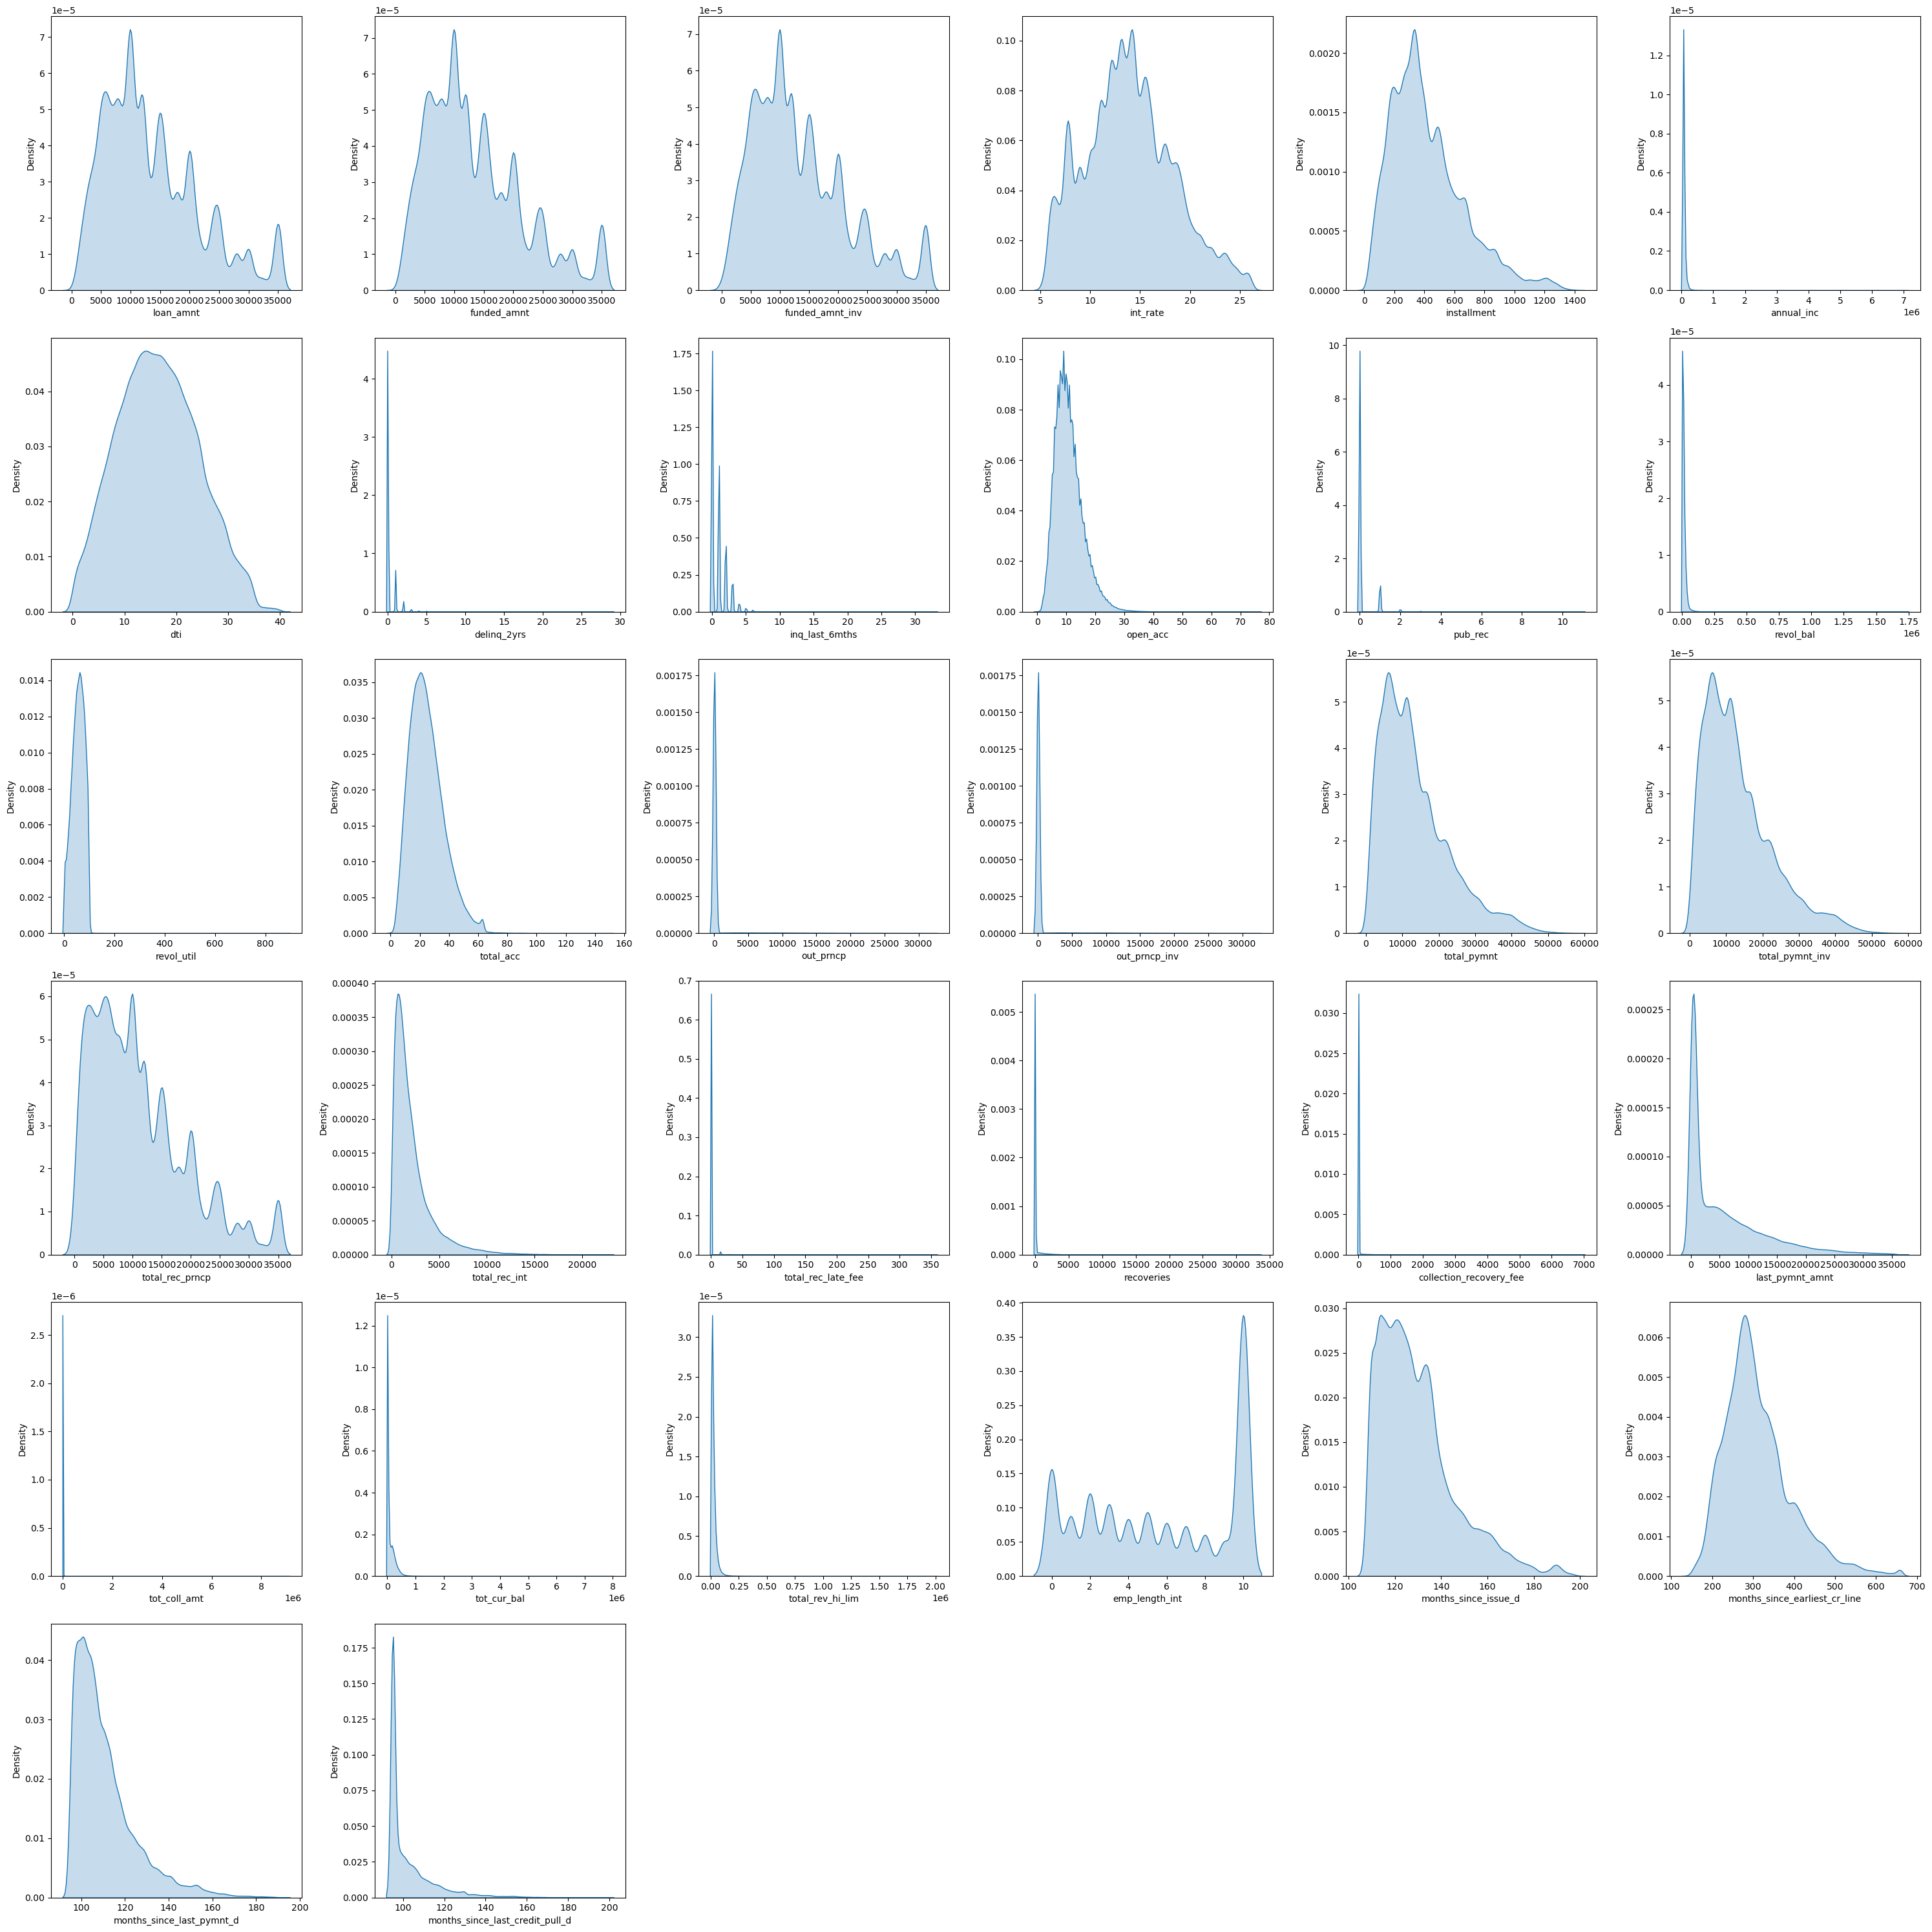

In [70]:
numerical_data = df.select_dtypes(exclude='object')
col = numerical_data.columns

num_plots = len(col)
num_rows = 6
num_cols = 6

# Hitung jumlah total halaman subplot yang diperlukan
num_pages = (num_plots - 1) // (num_rows * num_cols) + 1

for page in range(num_pages):
    plt.figure(figsize=(30, 30))
    for i in range(num_rows * num_cols):
        index = page * num_rows * num_cols + i
        if index < num_plots:
            plt.subplot(num_rows, num_cols, i + 1)
            sns.kdeplot(numerical_data[numerical_data.columns[index]], fill=True)
            plt.tight_layout()

    plt.show()

In [71]:
numerik.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,240841.0,13509.021512,8073.644323,500.00,7250.00,12000.00,18000.00000,3.500000e+04
funded_amnt,240841.0,13463.967618,8049.455330,500.00,7200.00,12000.00,18000.00000,3.500000e+04
funded_amnt_inv,240841.0,13336.789573,8087.375652,0.00,7175.00,11950.00,18000.00000,3.500000e+04
int_rate,240841.0,13.870541,4.384423,5.42,10.99,13.67,16.59000,2.606000e+01
installment,240841.0,417.539883,243.870119,15.67,239.78,365.23,546.44000,1.408130e+03
annual_inc,240841.0,71953.826490,55130.872323,1896.00,45000.00,61500.00,86000.00000,7.141778e+06
dti,240841.0,16.459467,7.703424,0.00,10.73,16.16,21.91000,3.999000e+01
delinq_2yrs,240841.0,0.249459,0.737658,0.00,0.00,0.00,0.00000,2.900000e+01
inq_last_6mths,240841.0,0.905772,1.172318,0.00,0.00,1.00,1.00000,3.300000e+01
open_acc,240841.0,10.864047,4.834458,0.00,7.00,10.00,13.00000,7.600000e+01


Dari ringkasan statistik diatas, dapat terlihat bahwa variabel-variabel yang memiliki nilai Q1, Q2, dan Q3 sebesar 0. Variabel-variabel tersebut adalah:

1. delinq_2yrs
2. pub_rec
3. out_prncp 
4. out_prncp_inv 
5. total_rec_late_fee
6. recoveries
7. collection_recovery_fee
8. tot_coll_amt

Variabel-variabel ini memiliki nilai Q1, Q2, dan Q3 yang sama dengan 0, yang menunjukkan bahwa sebagian besar data pada variabel-variabel ini adalah 0. Ini dapat menimbulkan masalah high bias atau bias tinggi pada model yang dibangun, terutama jika model cenderung sensitif terhadap ketidakseimbangan atau perbedaan dalam distribusi nilai.

Untuk dapat membantu menghindari bias yang mungkin timbul akibat perlakuan numerik terhadap variabel-variabel tersebut, maka melakukan konversi variabel-variabel tersebut ke tipe kategori dapat memberikan model informasi bahwa variabel-variabel ini sebenarnya memiliki tipe data kategorikal, bukan numerik.

- Kolom "delinq_2yrs" menunjukkan jumlah keterlambatan pembayaran (jumlah keterlambatan 30+ hari) yang dilakukan oleh peminjam dalam 2 tahun terakhir. Jika nilai pada kolom "delinq_2yrs" adalah 0, maka artinya tidak ada keterlambatan pembayaran dalam 2 tahun terakhir, sehingga dapat diberi label "None". Jika nilai pada kolom "delinq_2yrs" lebih besar dari 0, maka artinya ada keterlambatan pembayaran dalam 2 tahun terakhir, sehingga dapat diberi label "Delinquency".


- Kolom "pub_rec" menunjukkan jumlah catatan publik yang merujuk pada laporan kredit peminjam. Catatan publik ini mencakup informasi tentang kebangkrutan, pelanggaran, atau penundaan pembayaran. Jumlah catatan publik ini dapat digunakan sebagai indikator kualitas kredit seseorang. "None" jika nilai kolom "pub_rec" adalah 0, artinya tidak ada catatan publik, dan "Public Record" jika nilai kolom "pub_rec" lebih besar dari 0, artinya ada catatan publik.


- Kolom "out_prncp" adalah kolom yang menunjukkan jumlah pokok pinjaman yang belum dibayarkan oleh peminjam pada saat pengamatan terakhir. Ini menggambarkan berapa banyak pokok pinjaman yang masih harus dibayar oleh peminjam. "Paid" jika nilai kolom "out_prncp" adalah 0, artinya pokok pinjaman sudah lunas, dan "None" jika nilai kolom "out_prncp" lebih besar dari 0, artinya masih ada pokok pinjaman yang harus dibayar.


- Kolom "out_prncp_inv" adalah kolom yang menunjukkan jumlah pokok pinjaman yang belum dibayarkan oleh peminjam pada saat pengamatan terakhir, tetapi dalam kolom ini dihitung berdasarkan nilai yang diinvestasikan oleh investor. "Paid" jika nilai kolom "out_prncp_inv" adalah 0, artinya pokok pinjaman sudah lunas, dan "None" jika nilai kolom "out_prncp_inv" lebih besar dari 0, artinya masih ada pokok pinjaman yang harus dibayar.


- Kolom "total_rec_late_fee" adalah kolom yang menunjukkan total biaya keterlambatan pembayaran oleh peminjam pada saat pengamatan terakhir. "None" jika nilai kolom "total_rec_late_fee" adalah 0, artinya tidak ada biaya keterlambatan, dan "Late Fee" jika nilai kolom "total_rec_late_fee" lebih besar dari 0, artinya ada biaya keterlambatan yang harus dibayar


- Kolom "collection_recovery_fee" adalah kolom yang menunjukkan total biaya pemulihan yang dibayarkan oleh peminjam setelah pengalihan pinjaman ke agen pemulihan atau kolektor. Biaya ini mencakup upaya untuk mengumpulkan pembayaran tunggakan dari peminjam yang telah gagal membayar pinjaman. "None" jika nilai kolom "collection_recovery_fee" adalah 0, artinya tidak ada biaya pemulihan, dan "Recovery Fee" jika nilai kolom "collection_recovery_fee" lebih besar dari 0, artinya ada biaya pemulihan yang harus dibayar.


- Kolom "tot_coll_amt" adalah kolom yang menunjukkan total jumlah tagihan yang tertagih pada saat pengamatan. "None" jika nilai kolom "tot_coll_amt" adalah 0, artinya tidak ada tagihan yang tertagih, dan "Collection" jika nilai kolom "tot_coll_amt" lebih besar dari 0, artinya ada tagihan yang tertagih.


- Kolom "recoveries" adalah kolom yang menunjukkan jumlah total dana yang berhasil dipulihkan dari peminjam yang mengalami tunggakan atau gagal membayar pinjaman. "None" jika nilai kolom "recoveries" adalah 0, artinya tidak ada dana yang berhasil dipulihkan, dan "Recovery" jika nilai kolom "recoveries" lebih besar dari 0, artinya ada dana yang berhasil dipulihkan.

In [72]:
# Menggunakan Numpy untuk membuat label berdasarkan kondisi
df['delinq_2yrs_label'] = np.where(df['delinq_2yrs'] == 0, 'None', 'Delinquency')
df['pub_rec_label'] = np.where(df['pub_rec'] == 0, 'None', 'Public Record')
df['out_prncp_label'] = np.where(df['out_prncp'] == 0, 'Paid', 'None')
df['out_prncp_inv_label'] = np.where(df['out_prncp_inv'] == 0, 'Paid', 'None')
df['total_rec_late_fee_label'] = np.where(df['total_rec_late_fee'] == 0, 'None', 'Late Fee')
df['collection_recovery_fee_label'] = np.where(df['collection_recovery_fee'] == 0, 'None', 'Recovery Fee')
df['tot_coll_amt_label'] = np.where(df['tot_coll_amt'] == 0, 'None', 'Collection')
df['recoveries_label'] = np.where(df['recoveries'] == 0, 'None', 'Recovery')


# Menghapus kolom asli yang tidak diperlukan
df.drop(['delinq_2yrs','pub_rec','out_prncp','out_prncp_inv','total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'tot_coll_amt'], axis=1, inplace=True)

### Categorical Data

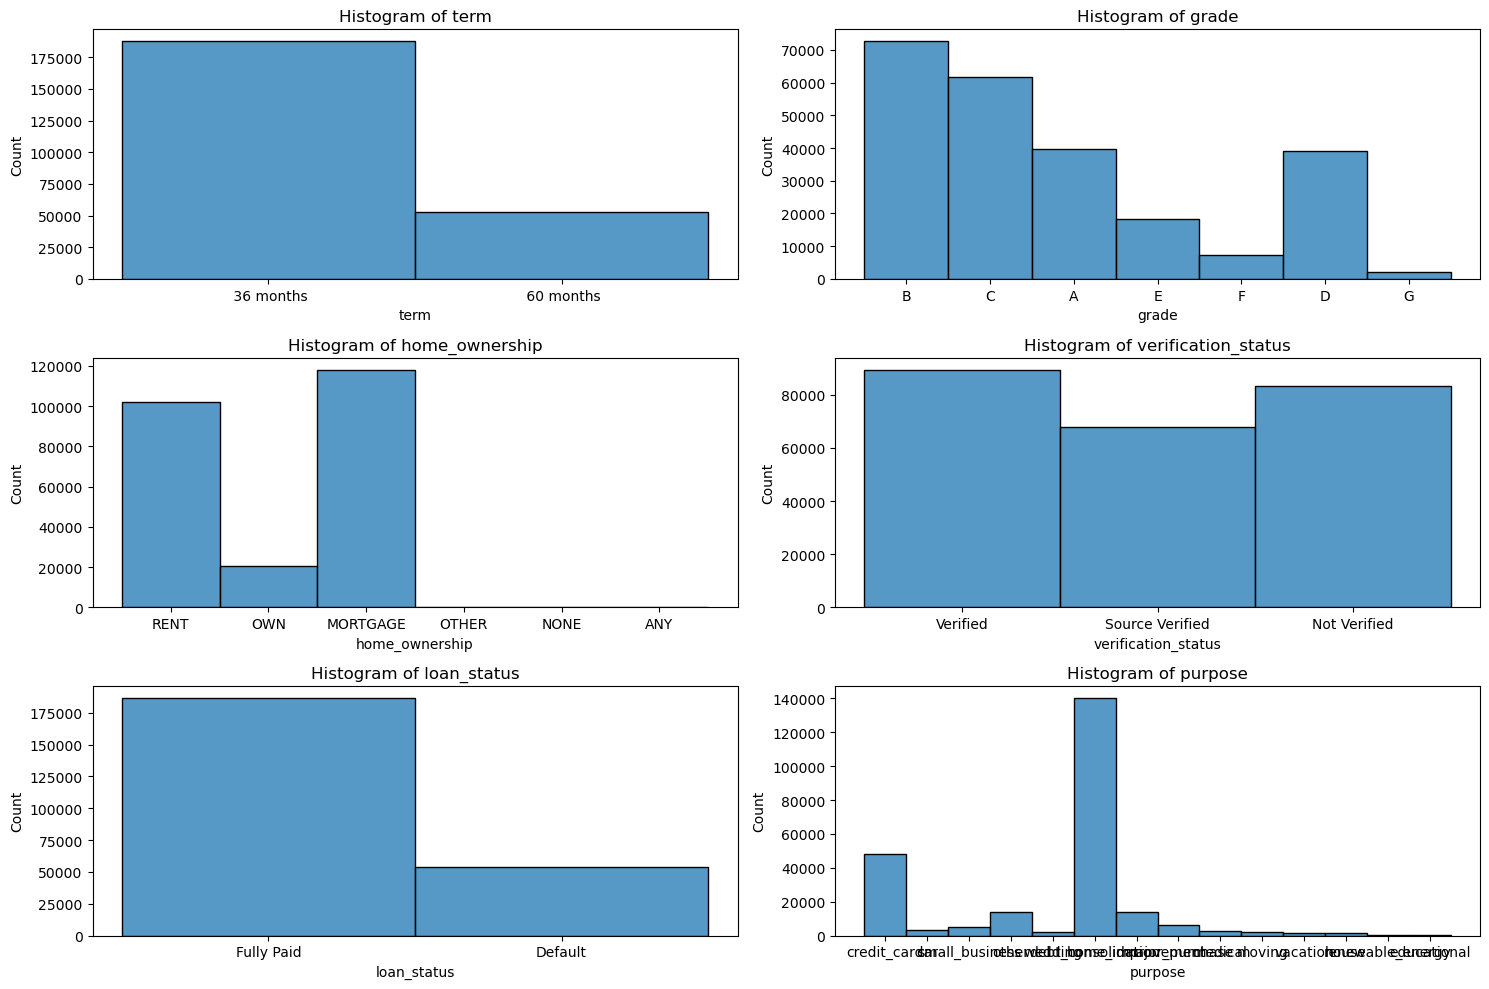

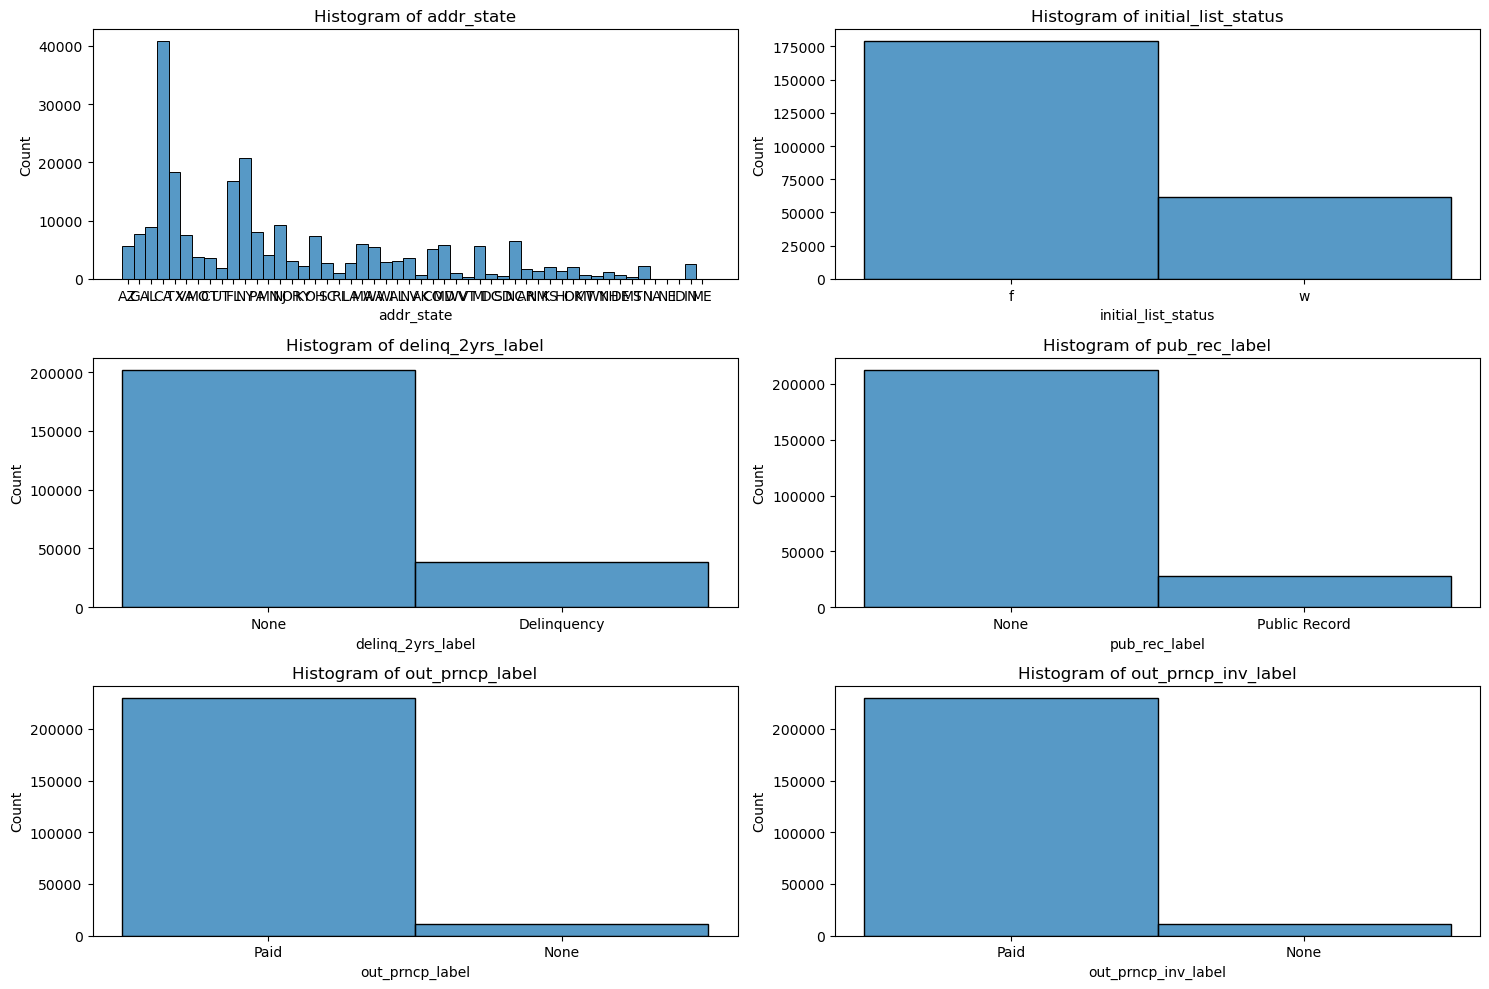

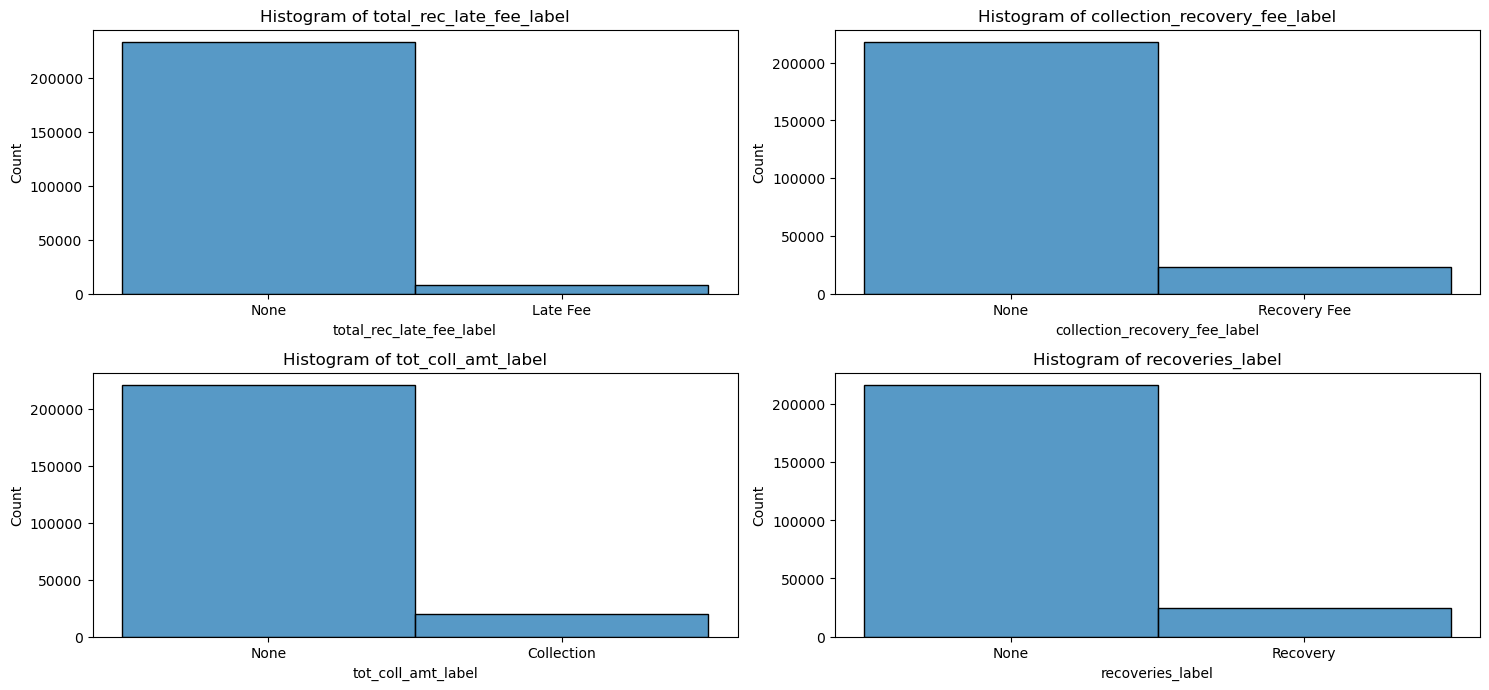

In [73]:
categorical_data = df.select_dtypes(include='object')
col = categorical_data.columns

# Mengatur jumlah baris dan kolom subplot
num_rows = 3
num_cols = 2

# Hitung jumlah total halaman subplot yang diperlukan
num_pages = (len(col) - 1) // (num_rows * num_cols) + 1

for page in range(num_pages):
    plt.figure(figsize=(15, 10))
    for i in range(num_rows * num_cols):
        index = page * num_rows * num_cols + i
        if index < len(col):
            plt.subplot(num_rows, num_cols, i + 1)
            sns.histplot(data=df, x=col[index])
            plt.title(f'Histogram of {col[index]}')
            plt.xlabel(col[index])
            plt.ylabel('Count')
            plt.tight_layout()

    plt.show()

1. Variabel 'home_ownership' memiliki beberapa label yang jumlahnya tidak seimbang (imbalance), yaitu "NONE", "ANY", dan "OTHER"
2. Variabel 'purpose' memiliki beberapa label yang jumlahnya tidak seimbang (imbalance)

Dengan begitu Variabel 'home_ownership' dan Variabel 'purpose' akan dikelompokkan kembali dalam beberapa label 

In [74]:
df['home_ownership'].replace({'NONE':'RENT', 'ANY':'RENT', 'OTHER':'RENT'},inplace=True)

df['purpose'].replace({'car':'other',
                       'small_business':'other',
                       'home_improvement':'other',
                       'major_purchase':'other',
                       'house':'other',
                       'medical':'other',
                       'moving':'other',
                       'vacation':'other',
                       'wedding':'other',
                       'educational':'other',
                       'renewable_energy':'other'},inplace=True)

### Pie Chart

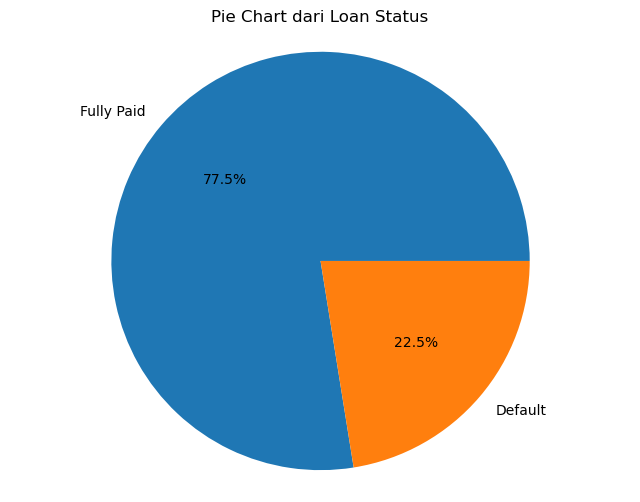

In [75]:
# Menghitung jumlah observasi untuk setiap kategori pada kolom 'Loan_status'
loan_status_counts = df['loan_status'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%')
plt.axis('equal')  
plt.title('Pie Chart dari Loan Status')
plt.show()

Dari hasil pie chart Loan Status, dapat dilihat bahwa proporsi kategori Fully Paid lebih besar dibandingkan kategori Default. Lebih spesifik, sekitar 77,5% dari data pada dataset memiliki status Fully Paid, sementara sekitar 22,5% memiliki status Default.

Insight yang dapat diambil dari grafik ini adalah bahwa mayoritas dari pinjaman dalam dataset ini telah dilunasi dengan baik (Fully Paid), sedangkan sebagian kecil mengalami gagal bayar (Default). Hal ini bisa menjadi indikasi bahwa sebagian besar nasabah telah melakukan pembayaran secara konsisten dan tepat waktu.

### Boxplot

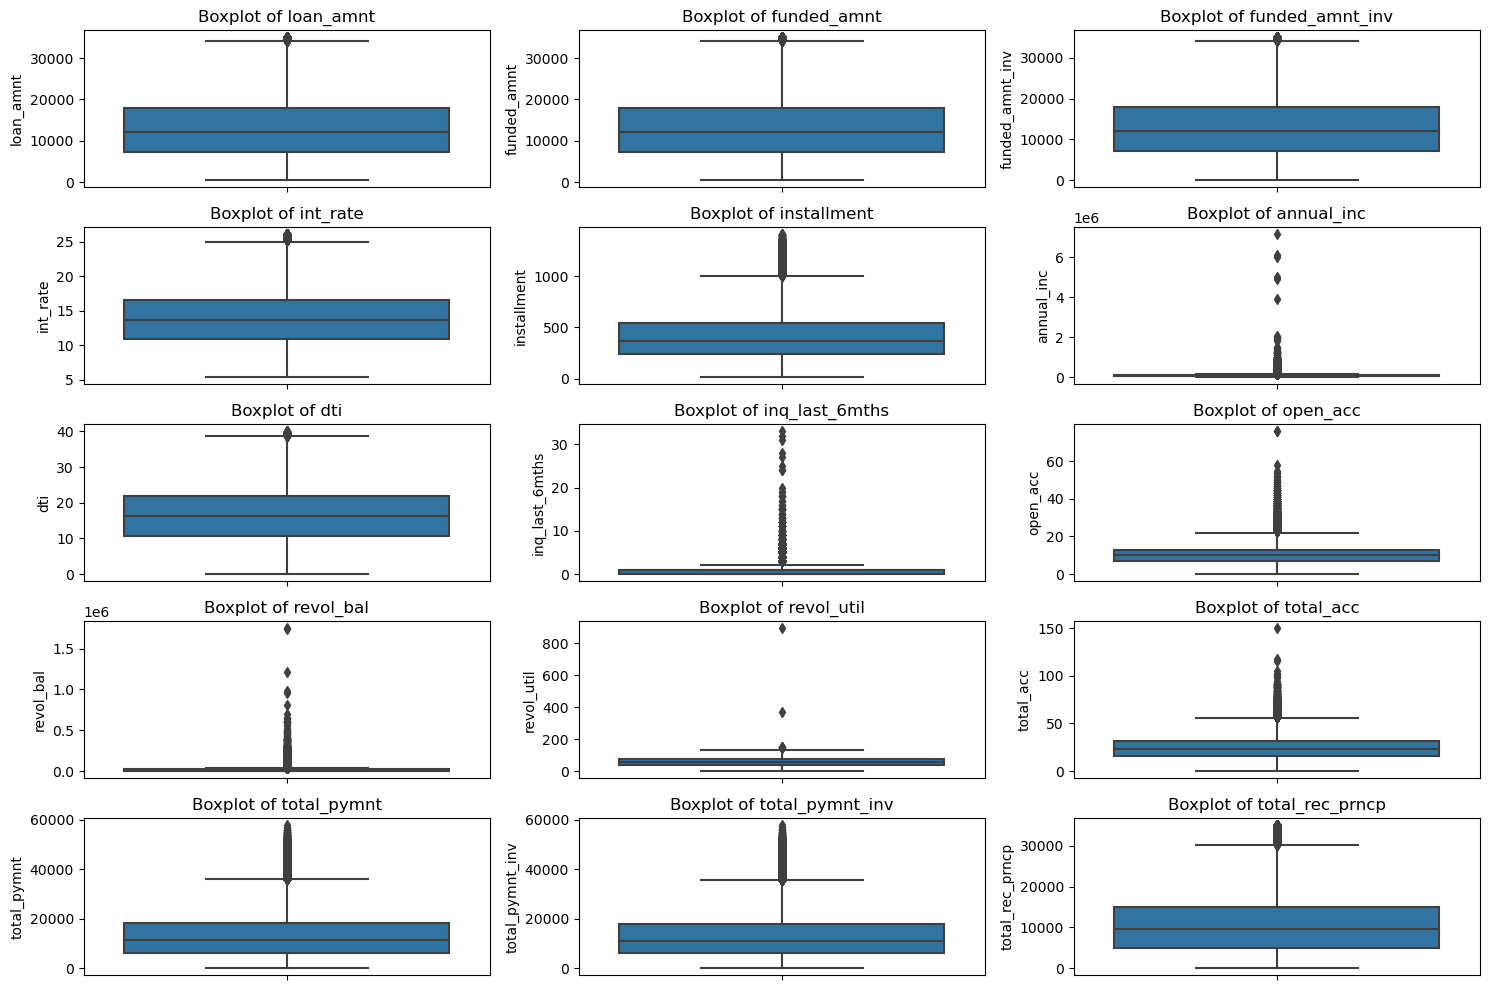

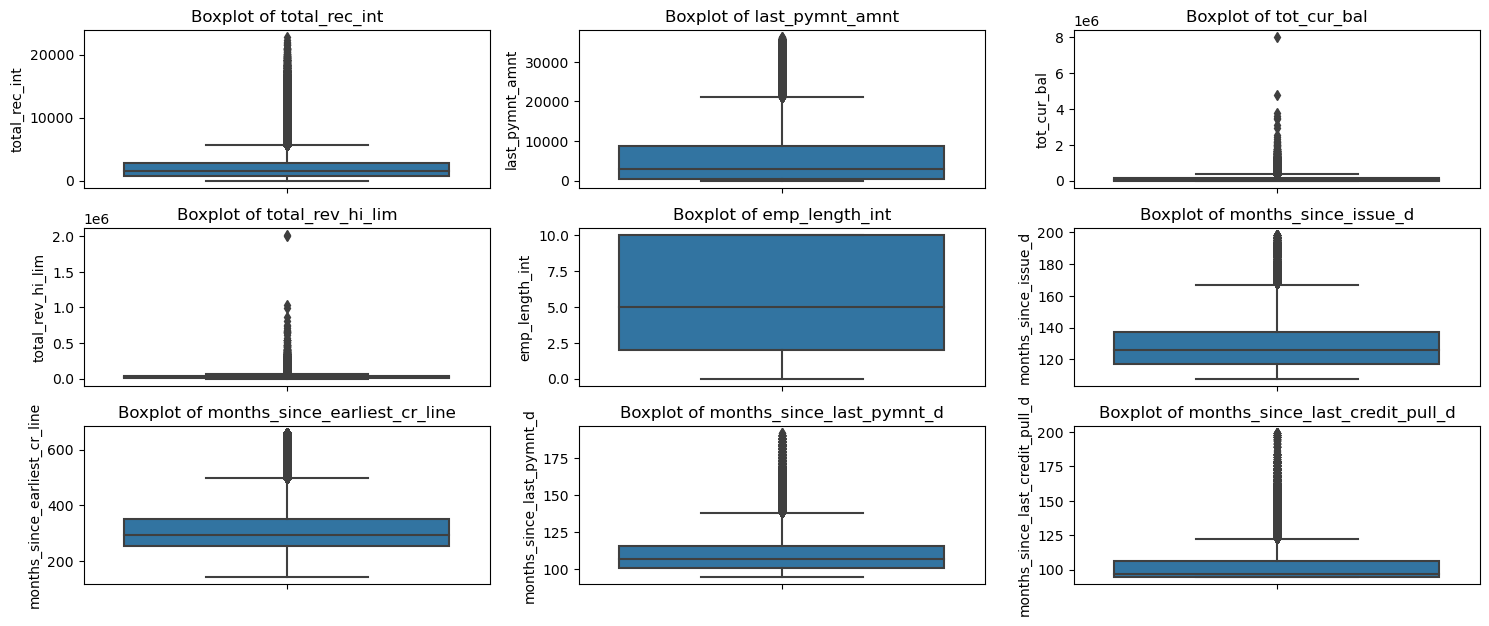

In [76]:
numerical_data = df.select_dtypes(exclude='object')
col = numerical_data.columns

# Menghitung jumlah total plot yang diperlukan berdasarkan jumlah kolom
num_plots = len(col)
num_rows = 5
num_cols = 3

# Hitung jumlah total halaman subplot yang diperlukan
num_pages = (num_plots - 1) // (num_rows * num_cols) + 1

for page in range(num_pages):
    plt.figure(figsize=(15, 10))
    for i in range(num_rows * num_cols):
        index = page * num_rows * num_cols + i
        if index < num_plots:
            plt.subplot(num_rows, num_cols, i + 1)
            sns.boxplot(data=numerical_data, y=col[index])
            plt.title(f'Boxplot of {col[index]}')
            plt.ylabel(col[index])
            plt.tight_layout()

    plt.show()

Dari beberapa variabel numerik yang ditampilkan dalam boxplot, terlihat bahwa beberapa variabel memiliki data outlier, yaitu data yang berada jauh dari kisaran nilai mayoritas atau nilai-nilai ekstrem. Outlier ini ditandai dengan adanya titik-titik yang berada jauh dari kotak (interquartile range) pada boxplot.

## Bivariat

### Uji Chi-Square (Chi-Square Test)

In [77]:
from scipy.stats import chi2_contingency

x = df.select_dtypes(include='object').drop('loan_status', axis=1)
y = df['loan_status']
col_kat = x.columns

p_values = {}  # Dictionary untuk menyimpan p-value dari setiap kolom

for i in col_kat:
    contingency_table = pd.crosstab(x[i], y)
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    p_values[i] = p_value

# Menampilkan hasil p-value untuk setiap kolom
for col, p_val in p_values.items():
    print('P-value for variable {}: {}'.format(col, p_val))


P-value for variable term: 0.0
P-value for variable grade: 0.0
P-value for variable home_ownership: 5.181429965508611e-128
P-value for variable verification_status: 0.0
P-value for variable purpose: 1.1554297376637204e-60
P-value for variable addr_state: 2.5118290601623225e-124
P-value for variable initial_list_status: 2.7790924505100582e-99
P-value for variable delinq_2yrs_label: 1.0844549857870517e-48
P-value for variable pub_rec_label: 2.993618653057703e-15
P-value for variable out_prncp_label: 0.0
P-value for variable out_prncp_inv_label: 0.0
P-value for variable total_rec_late_fee_label: 0.0
P-value for variable collection_recovery_fee_label: 0.0
P-value for variable tot_coll_amt_label: 9.651214690082387e-68
P-value for variable recoveries_label: 0.0


Dari hasil uji Chi-Square untuk setiap variabel kategorikal terhadap kolom 'loan_status', diperoleh p-value untuk masing-masing variabel. Berikut adalah insight yang dapat diperoleh dari hasil uji Chi-Square ini:

1. Variabel-variabel dengan p-value mendekati atau sama dengan nol (0.0) menunjukkan bahwa ada hubungan yang signifikan antara variabel tersebut dengan kolom 'loan_status', sehingga variabel-variabel ini berpotensi menjadi prediktor yang kuat untuk memprediksi status pinjaman:

    - grade: Nilai p-value sangat rendah, menunjukkan hubungan yang signifikan antara grade (peringkat kredit) dengan kemungkinan kredit macet.
    - verification_status: Nilai p-value sangat rendah, menunjukkan hubungan yang signifikan antara status verifikasi dengan kemungkinan kredit macet.
    - total_rec_late_fee_label: Nilai p-value sangat rendah, menunjukkan hubungan yang signifikan antara label total denda keterlambatan pembayaran dengan kemungkinan kredit macet.
    - collection_recovery_fee_label: Nilai p-value sangat rendah, menunjukkan hubungan yang signifikan antara label biaya pemulihan koleksi dengan kemungkinan kredit macet.
    - recoveries_label: Nilai p-value sangat rendah, menunjukkan hubungan yang signifikan antara label pemulihan dana dengan kemungkinan kredit macet.


2. Variabel-variabel dengan p-value yang cukup rendah (meskipun tidak mendekati nol) juga menunjukkan adanya hubungan yang signifikan dengan kolom 'loan_status', sehingga variabel-variabel ini juga potensial untuk menjadi prediktor penting dalam memprediksi status pinjaman:

    - home_ownership: Nilai p-value rendah, menunjukkan hubungan yang signifikan antara kepemilikan rumah dengan kemungkinan kredit macet.
    - purpose: Nilai p-value rendah, menunjukkan hubungan yang signifikan antara tujuan peminjaman dengan kemungkinan kredit macet.
    - addr_state: Nilai p-value rendah, menunjukkan hubungan yang signifikan antara negara bagian alamat peminjam dengan kemungkinan kredit macet.
    - initial_list_status: Nilai p-value rendah, menunjukkan hubungan yang signifikan antara status listing awal dengan kemungkinan kredit macet.
    - delinq_2yrs_label: Nilai p-value rendah, menunjukkan hubungan yang signifikan antara label keterlambatan pembayaran 2 tahun dengan kemungkinan kredit macet.
    - pub_rec_label: Nilai p-value rendah, menunjukkan hubungan yang signifikan antara label catatan publik dengan kemungkinan kredit macet.
    - tot_coll_amt_label: Nilai p-value rendah, menunjukkan hubungan yang signifikan antara label total jumlah koleksi dengan kemungkinan kredit macet.

### Uji Korelasi Pearson

In [78]:
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

# Membuat salinan dataframe untuk menghindari perubahan data asli
df_encoded = df.copy()

# Mengkodekan nilai kategori dalam kolom 'loan_status' menjadi nilai numerik
label_encoder = LabelEncoder()
df_encoded['loan_status_encoded'] = label_encoder.fit_transform(df_encoded['loan_status'])

# Kolom 'loan_status_encoded' sebagai target variabel
target_column = 'loan_status_encoded'

# Mengambil semua kolom kecuali kolom target sebagai fitur
feature_columns = df_encoded.drop(target_column, axis=1).select_dtypes(include='number').columns

# Melakukan uji korelasi Pearson untuk setiap kolom fitur
for column in feature_columns:
    correlation, p_value = pearsonr(df_encoded[column], df_encoded[target_column])
    print("Korelasi antara {} dan {}: {}".format(column, 'loan_status', correlation))
    print("P-Value: {}".format(p_value))
    print("------------------------")


Korelasi antara loan_amnt dan loan_status: -0.07847098566074857
P-Value: 0.0
------------------------
Korelasi antara funded_amnt dan loan_status: -0.07887536420401488
P-Value: 0.0
------------------------
Korelasi antara funded_amnt_inv dan loan_status: -0.07696919193400323
P-Value: 3.79427799054e-313
------------------------
Korelasi antara int_rate dan loan_status: -0.25713271408860977
P-Value: 0.0
------------------------
Korelasi antara installment dan loan_status: -0.059215467762036976
P-Value: 5.446072609402557e-186
------------------------
Korelasi antara annual_inc dan loan_status: 0.058598490915694856
P-Value: 3.591588002122941e-182
------------------------
Korelasi antara dti dan loan_status: -0.1304464946311619
P-Value: 0.0
------------------------
Korelasi antara inq_last_6mths dan loan_status: -0.052808173793588535
P-Value: 2.765182386115648e-148
------------------------
Korelasi antara open_acc dan loan_status: -0.03012961332049013
P-Value: 1.7108046013013897e-49
-------

Dari hasil uji korelasi Pearson antara setiap fitur numerik dengan kolom 'loan_status', berikut adalah beberapa insight yang dapat diperoleh:

1. Korelasi dengan 'loan_status':

    - Fitur-fitur dengan korelasi negatif yang cukup rendah (rata-rata di bawah -0.1) dengan 'loan_status', antara lain: 'int_rate', 'dti', 'inq_last_6mths', 'open_acc', 'revol_util', 'total_rec_int', 'months_since_last_pymnt_d'.
    - Fitur-fitur dengan korelasi positif yang cukup rendah (rata-rata di bawah 0.1) dengan 'loan_status', antara lain: 'total_acc', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length_int', 'months_since_issue_d', 'months_since_earliest_cr_line', 'months_since_last_credit_pull_d'.


2. P-Value:
    - Semua fitur numerik memiliki p-value yang sangat kecil (dekat dengan nol), menunjukkan bahwa semua fitur ini memiliki hubungan yang signifikan dengan variabel target 'loan_status'.


3. Signifikansi Fitur:

    - Fitur-fitur yang memiliki korelasi dengan 'loan_status' yang cukup kuat (di atas 0.3 atau di bawah -0.3) adalah: 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'last_pymnt_amnt'.
    - Fitur-fitur ini memiliki potensi besar untuk menjadi fitur penting dalam membangun model prediksi kredit karena memiliki korelasi yang signifikan dengan status pinjaman ('loan_status').


4. Pengaruh Fitur:

    - Fitur 'int_rate' memiliki korelasi negatif yang cukup tinggi dengan 'loan_status', artinya semakin tinggi suku bunga, kemungkinan kreditur gagal membayar pinjaman semakin tinggi.
    - Fitur 'total_pymnt', 'total_pymnt_inv', dan 'total_rec_prncp' memiliki korelasi positif yang cukup tinggi dengan 'loan_status', artinya semakin besar jumlah pembayaran dan pokok yang diterima dari peminjam, semakin rendah kemungkinan peminjam akan gagal membayar pinjaman.

## Multivariat

### Heatmap

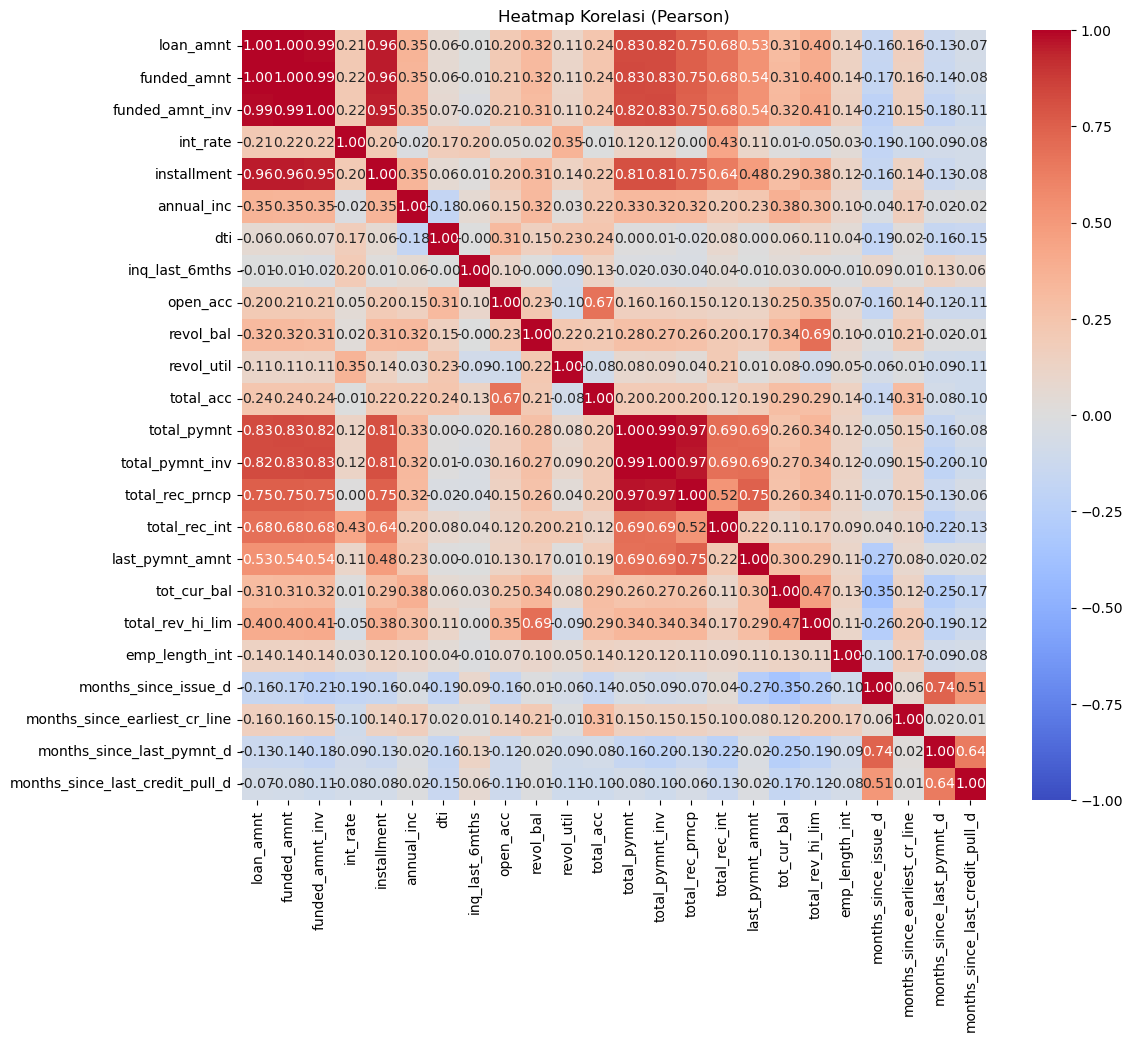

In [79]:
# Menghitung matriks korelasi Pearson
correlation_matrix = df.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Heatmap Korelasi (Pearson)')
plt.show()

Dari heatmap korelasi (Pearson) yang telah dibuat, didapatkan beberapa insights:


1. Korelasi Positif: Nilai yang mendekati 1 menunjukkan korelasi positif yang kuat antara dua variabel. Jika dua variabel memiliki korelasi positif yang tinggi, artinya ketika salah satu variabel meningkat, kemungkinan besar variabel lain juga akan meningkat, dan sebaliknya. Korelasi positif yang kuat adalah antara 'total_pymnt' dan 'total_rec_prncp'.


2. Korelasi Negatif: Nilai yang mendekati -1 menunjukkan korelasi negatif yang kuat antara dua variabel. Jika dua variabel memiliki korelasi negatif yang tinggi, artinya ketika salah satu variabel meningkat, kemungkinan besar variabel lain akan menurun, dan sebaliknya. korelasi negatif yang kuat adalah antara 'int_rate' dan 'loan_status'.


3. Korelasi Dekat Nol: Nilai yang mendekati 0 menunjukkan bahwa dua variabel memiliki korelasi yang lemah atau tidak ada korelasi sama sekali. Jika nilai korelasi mendekati 0, artinya perubahan dalam satu variabel tidak berpengaruh pada perubahan variabel lainnya. korelasi dekat nol adalah antara 'revol_bal' dan 'loan_status'.

# Data Preprocessing

## Label Encoding

Untuk kolom 'grade' lebih baik menggunakan label encoding karena kolom 'grade' merupakan data kategori ordinal, artinya nilai-nilainya memiliki urutan atau tingkatan yang memiliki arti berurutan

In [80]:
df['grade'] = df['grade'].astype('category').cat.codes

Mengubah nilai pada kolom 'loan_status' menjadi nilai numerik

In [81]:
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])

## One Hot Encoding

Untuk kolom 'term', 'home_ownership' dan 'purpose' lebih baik menggunakan one hot encoding karena kolom tersebut merupakan data kategori nominal, artinya nilai-nilainya tidak memiliki urutan atau tingkatan yang berarti. 

In [82]:
ohe_list = ['term', 'home_ownership', 'verification_status', 'purpose', 'addr_state','initial_list_status','delinq_2yrs_label','pub_rec_label','out_prncp_label','out_prncp_inv_label','total_rec_late_fee_label','collection_recovery_fee_label','tot_coll_amt_label','recoveries_label']
ohe = pd.get_dummies(df, columns=ohe_list, drop_first=True)

## Data Cleansing

Data dipisah terlebih dahulu menjadi fitur dan target, lalu dipisah lebih lanjut menjadi data train dan test. Data train akan digunakan untuk membentuk model, sedangkan data test akan digunakan untuk menguji model yang dihasilkan.

In [83]:
# split data into features & target
target = 'loan_status'
features = df.loc[:, df.columns != target].columns
y_data = df['loan_status']
x_data = ohe.drop(columns=['loan_status'])

In [84]:
# initialize random state
random_state = 25

# split data menjadi 80% data train dan 20% data test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=random_state, stratify=y_data)

# check amount of data on train and test
print('banyaknya data train =', x_train.shape[0])
print('banyaknya data test =', x_test.shape[0])

# check if split is balanced based on target value
print('mean value of y on train =', y_train.mean())
print('mean value of y on test =', y_test.mean())

banyaknya data train = 192672
banyaknya data test = 48169
mean value of y on train = 0.7753124480983226
mean value of y on test = 0.7753119226058254


## Handle missing values, duplicated data, dan outliers

In [85]:
# Ambil kolom numerik dari data train
numerical_data = x_train.select_dtypes(include='number')
nums = numerical_data.columns

# Buat DataFrame untuk menyimpan z-score
zscore = pd.DataFrame()
outlier = pd.DataFrame()
filtered_zscore = np.array([True] * len(x_train))

# Loop melalui setiap kolom numerik dan hitung absolute z-score
for col in nums:
    zscore[col] = abs(stats.zscore(x_train[col]))

# Identifikasi outlier dengan z-score lebih dari 3
outlier = x_train[zscore > 3]

# Informasi tentang outlier
print("Informasi tentang outlier:")
print(outlier.info())

Informasi tentang outlier:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 192672 entries, 137073 to 65227
Data columns (total 90 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   loan_amnt                                   0 non-null      float64
 1   funded_amnt                                 0 non-null      float64
 2   funded_amnt_inv                             0 non-null      float64
 3   int_rate                                    0 non-null      float64
 4   installment                                 2636 non-null   float64
 5   grade                                       1631 non-null   float64
 6   annual_inc                                  1853 non-null   float64
 7   dti                                         50 non-null     float64
 8   inq_last_6mths                              2430 non-null   float64
 9   open_acc                                    1861 n

In [86]:
# Ambil kolom numerik dari data train
numerical_data = x_train.select_dtypes(include='number')
nums = numerical_data.columns

# Buat DataFrame untuk menyimpan outlier
outlier = pd.DataFrame()

# Loop melalui setiap kolom numerik dan hitung Q1, Q3, dan IQR
for col in nums:
    Q1 = x_train[col].quantile(0.25)
    Q3 = x_train[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Identifikasi outlier
    outlier[col] = x_train[col][(x_train[col] < Q1 - 1.5 * IQR) | (x_train[col] > Q3 + 1.5 * IQR)]

# Informasi tentang outlier
print("Informasi tentang outlier:")
print(outlier.info())

Informasi tentang outlier:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5954 entries, 438839 to 360483
Data columns (total 90 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   loan_amnt                                   5954 non-null   int64  
 1   funded_amnt                                 5863 non-null   float64
 2   funded_amnt_inv                             5803 non-null   float64
 3   int_rate                                    130 non-null    float64
 4   installment                                 3102 non-null   float64
 5   grade                                       0 non-null      float64
 6   annual_inc                                  1796 non-null   float64
 7   dti                                         6 non-null      float64
 8   inq_last_6mths                              726 non-null    float64
 9   open_acc                                    270 non

In [87]:
# drop outlier menggunakan zscore
print(f'jumlah baris data train SEBELUM filter outlier: {len(x_train)}')

# get index of outliers
outlier_id = outlier.index
x_train_outlier_removed = x_train.drop(outlier_id)
y_train_outlier_removed = y_train.drop(outlier_id)

print(f'jumlah baris data train SETELAH filter outlier: {len(x_train_outlier_removed)}')
print(f'Pemeriksaan apakah jumlah baris x_train dan y_train sama: {len(x_train_outlier_removed) == len(y_train_outlier_removed)}')

jumlah baris data train SEBELUM filter outlier: 192672
jumlah baris data train SETELAH filter outlier: 186718
Pemeriksaan apakah jumlah baris x_train dan y_train sama: True


Pembersihan outlier pada data train dilakukan untuk menghilangkan data-data yang ekstrem atau tidak biasa, sehingga dapat meningkatkan kualitas dan performa model yang akan dibangun.

Dengan menghilangkan outlier, dapat memastikan bahwa data train yang digunakan untuk pembentukan model lebih representatif dan tidak terpengaruh oleh nilai-nilai ekstrem yang tidak biasa. Ini dapat meningkatkan kemampuan model untuk melakukan generalisasi pada data baru dan mengurangi risiko overfitting.

Dalam tahap ini, dipilih metode z-score untuk menentukan dan menghapus data outlier. Jumlah data train berkurang dari 192672 menjadi 186718.

## Feature Transformation

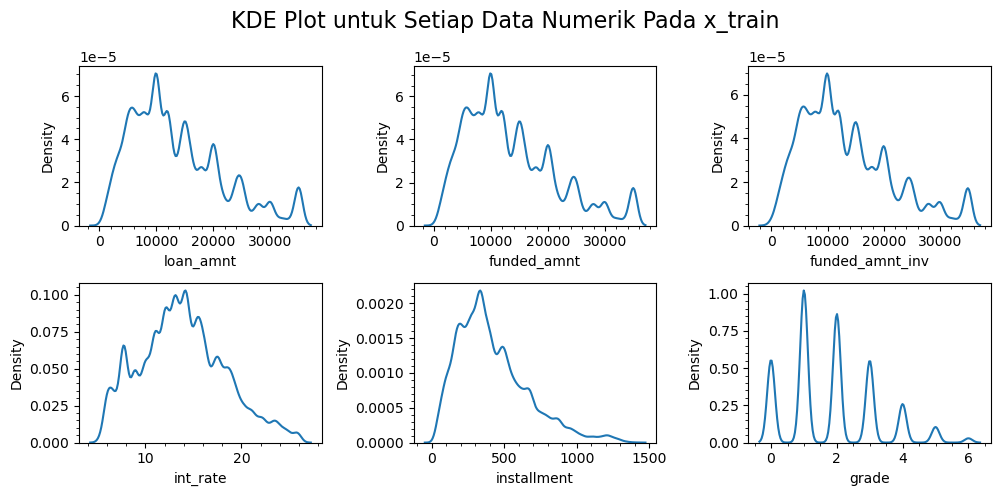

In [88]:
numerical_data = x_train.select_dtypes(include='number')
nums = numerical_data.columns

fig, axes = plt.subplots(2, 3, figsize=(10, 5))
fig.suptitle('KDE Plot untuk Setiap Data Numerik Pada x_train', fontsize=16)

i = 0
for y in axes:
    for ax in y:
        column = nums[i]
        sns.kdeplot(x_train[column], ax=ax)
        ax.minorticks_on()
        i += 1

fig.tight_layout(pad=1)
plt.show()

In [89]:
# menghitung derajat skewness dari tiap data numerik
skew_score = []                          
for i in nums:
  skew_score.append(round(skew(x_train_outlier_removed[i]),3))

df_skewness = pd.DataFrame({'fitur':nums, 'derajat skewness':skew_score})
df_skewness

,fitur,derajat skewness
0,loan_amnt,0.651
1,funded_amnt,0.659
2,funded_amnt_inv,0.652
3,int_rate,0.330
4,installment,0.779
...,...,...
85,out_prncp_inv_label_Paid,-4.429
86,total_rec_late_fee_label_None,-5.195
87,collection_recovery_fee_label_Recovery Fee,2.757
88,tot_coll_amt_label_None,-3.047


Dari hasil KDEplot dan derajat skewness beberapa fitur perlu dilakukan normalisasi, yaitu:
- 'annual_inc' 
- 'revol_bal'
- 'total_rev_hi_lim'
- 'installment'
- 'total_acc' 
- 'total_pymnt'
- 'total_pymnt_inv' 
- 'total_rec_prncp'
- 'total_rec_int'
- 'last_pymnt_amnt' 
- 'tot_cur_bal'
- 'emp_length_int' 
- 'months_since_issue_d'
- 'months_since_earliest_cr_line' 
- 'months_since_last_pymnt_d'
- 'months_since_last_credit_pull_d' 

In [90]:
# Kolom yang akan dinormalisasi
columns_to_normalize = ['annual_inc', 'revol_bal', 'total_rev_hi_lim', 'installment', 'total_acc',
                        'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
                        'last_pymnt_amnt', 'tot_cur_bal', 'emp_length_int', 'months_since_issue_d',
                        'months_since_earliest_cr_line', 'months_since_last_pymnt_d',
                        'months_since_last_credit_pull_d']

# Normalisasi menggunakan MinMaxScaler pada x_train dan x_test
scaler = MinMaxScaler()
x_train[columns_to_normalize] = scaler.fit_transform(x_train[columns_to_normalize])
x_test[columns_to_normalize] = scaler.transform(x_test[columns_to_normalize])

# Log Transformation pada x_train dan x_test
columns_to_log_transform = ['annual_inc', 'revol_bal', 'total_rev_hi_lim', 'installment', 'total_acc',
                            'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
                            'last_pymnt_amnt', 'tot_cur_bal', 'emp_length_int', 'months_since_issue_d',
                            'months_since_earliest_cr_line', 'months_since_last_pymnt_d',
                            'months_since_last_credit_pull_d']

x_train[columns_to_log_transform] = np.log1p(x_train[columns_to_log_transform])
x_test[columns_to_log_transform] = np.log1p(x_test[columns_to_log_transform])

# Tampilkan hasilnya
print("Hasil Normalisasi menggunakan MinMaxScaler pada x_train:")
print(x_train.skew())
print("\nHasil Normalisasi menggunakan MinMaxScaler pada x_test:")
print(x_test.skew())
print("\nHasil Log Transformation pada x_train:")
print(x_train.skew())
print("\nHasil Log Transformation pada x_test:")
print(x_test.skew())

Hasil Normalisasi menggunakan MinMaxScaler pada x_train:
loan_amnt                                     0.834353
funded_amnt                                   0.841681
funded_amnt_inv                               0.835493
int_rate                                      0.319866
installment                                   0.660860
                                                ...   
out_prncp_inv_label_Paid                     -4.376441
total_rec_late_fee_label_None                -5.176049
collection_recovery_fee_label_Recovery Fee    2.735567
tot_coll_amt_label_None                      -3.063122
recoveries_label_Recovery                     2.644774
Length: 90, dtype: float64

Hasil Normalisasi menggunakan MinMaxScaler pada x_test:
loan_amnt                                     0.845206
funded_amnt                                   0.853254
funded_amnt_inv                               0.846014
int_rate                                      0.315235
installment                       

Dari hasil normalisasi menggunakan MinMaxScaler dan log transformation pada x_train dan x_test, berikut adalah insight yang dapat diambil:

1. Hasil Normalisasi menggunakan MinMaxScaler:
    Setelah normalisasi menggunakan MinMaxScaler pada x_train dan x_test, nilai skewness dari sebagian besar fitur cenderung berkurang dan mendekati 0. Hal ini menunjukkan bahwa normalisasi berhasil dalam mengurangi perbedaan skala pada fitur-fitur tersebut dan mendekatkan distribusi data pada rentang [0, 1]. Namun, beberapa fitur seperti 'annual_inc', 'revol_bal', dan 'total_rev_hi_lim' masih memiliki nilai skewness yang cukup tinggi setelah normalisasi.


2. Hasil Log Transformation:
    Setelah log transformation pada x_train dan x_test, terlihat bahwa skewness pada sebagian besar fitur berhasil diperkecil dan mendekati 0. Log transformation berhasil dalam mengurangi perbedaan skala dan menciptakan distribusi data yang lebih simetris. Hal ini dapat berguna dalam meningkatkan kinerja model, terutama jika model yang digunakan membutuhkan asumsi data terdistribusi normal.

# Training Model Machine Learning

### Melakukan Cross Validation

In [96]:
# Inisialisasi algoritma
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier()
}

# Melatih dan evaluasi model menggunakan cross-validation
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    results[model_name] = scores.mean()

# Menampilkan hasil perbandingan kinerja model
for model_name, accuracy in results.items():
    print(f"{model_name}: Accuracy = {accuracy:.4f}")

Logistic Regression: Accuracy = 0.7721
Decision Tree: Accuracy = 0.9951
Random Forest: Accuracy = 0.9976
SVM: Accuracy = 0.7753
XGBoost: Accuracy = 0.9992


In [103]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier()
}

# Perform cross-validation and scoring
scoring = ['accuracy', 'precision', 'recall']
results = []
for model_name, model in models.items():
    cv_results = cross_validate(model, x_train, y_train, cv=5, scoring=scoring, return_train_score=True)
    result = {
        'Model': model_name,
        'Training Accuracy': cv_results['train_accuracy'].mean(),
        'CV Accuracy (mean)': cv_results['test_accuracy'].mean(),
        'CV Accuracy (std)': cv_results['test_accuracy'].std(),
        'Training Precision': cv_results['train_precision'].mean(),
        'CV Precision (mean)': cv_results['test_precision'].mean(),
        'CV Precision (std)': cv_results['test_precision'].std(),
        'Training Recall': cv_results['train_recall'].mean(),
        'CV Recall (mean)': cv_results['test_recall'].mean(),
        'CV Recall (std)': cv_results['test_recall'].std()
    }
    results.append(result)

# Display the results as a Pandas DataFrame
df_results = pd.DataFrame(results)
print(df_results)

                 Model  Training Accuracy  CV Accuracy (mean)  \
0  Logistic Regression           0.772213            0.772131   
1        Decision Tree           1.000000            0.995121   
2        Random Forest           0.999999            0.997628   
3                  SVM           0.775312            0.775312   
4              XGBoost           0.999996            0.999180   

   CV Accuracy (std)  Training Precision  CV Precision (mean)  \
0           0.000750            0.778343             0.778332   
1           0.000713            1.000000             0.996867   
2           0.000273            0.999998             0.996950   
3           0.000009            0.775312             0.775312   
4           0.000172            0.999995             0.998950   

   CV Precision (std)  Training Recall  CV Recall (mean)  CV Recall (std)  
0            0.000700          0.98739          0.987267         0.001271  
1            0.000250          1.00000          0.996840         0

Dari hasil tersebut, model XGBoost memiliki performa yang lebih baik dibandingkan dengan model lainnya. Model XGBoost memiliki CV Accuracy (mean) dan CV Precision (mean) yang lebih tinggi dibandingkan dengan model lain, yaitu sekitar 0.999 dan 0.999. Sebagai hasilnya, untuk membangun model yang dapat memprediksi credit risk, model XGBoost merupakan pilihan yang sangat baik berdasarkan hasil evaluasi tersebut. 

## XGBoost Classifier

In [106]:
# Tentukan hyperparameter yang ingin dituning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Buat objek GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Lakukan hyperparameter tuning pada data training
grid_search.fit(x_train, y_train)

# Cetak hyperparameter terbaik yang ditemukan
print("Best hyperparameters: ", grid_search.best_params_)

# Evaluasi model dengan hyperparameter terbaik pada data train dan test
best_xgb_model = grid_search.best_estimator_
y_pred_train = best_xgb_model.predict(x_train)
y_pred_test = best_xgb_model.predict(x_test)

# Skor evaluasi pada data train dan test
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Skor evaluasi lainnya berdasarkan data test
f1 = f1_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
jaccard = jaccard_score(y_test, y_pred_test)
logloss = log_loss(y_test, y_pred_test)

print("Accuracy score data TRAIN: {:.4f}".format(accuracy_train))
print("Accuracy score data TEST: {:.4f}".format(accuracy_test))
print("F-1 score: {:.4f}".format(f1))
print("Precision score: {:.4f}".format(precision))
print("Jaccard score: {:.4f}".format(jaccard))
print("Log Loss: {:.4f}".format(logloss))

Best hyperparameters:  {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}
Accuracy score data TRAIN: 1.0000
Accuracy score data TEST: 0.9994
F-1 score: 0.9996
Precision score: 0.9992
Jaccard score: 0.9992
Log Loss: 0.0222


Hasil yang bagus dari model XGBoost dengan hyperparameter terbaik dapat dijelaskan sebagai berikut:

1. Best Hyperparameters: Hyperparameter terbaik yang ditemukan oleh GridSearchCV adalah sebagai berikut:

    - colsample_bytree: 0.9
    - learning_rate: 0.2
    - max_depth: 5
    - n_estimators: 200
    - subsample: 0.9


2. Accuracy Score: Akurasi pada data train mencapai 1.0000, yang artinya model berhasil memprediksi semua data training dengan benar. Pada data test, akurasi mencapai 0.9994, yang menunjukkan bahwa model juga memiliki kinerja yang sangat baik pada data yang belum pernah dilihat sebelumnya.


3. F-1 Score: F-1 score adalah rata-rata harmonik antara precision dan recall. Nilai F-1 score yang tinggi (0.9996) menunjukkan bahwa model memiliki keseimbangan yang baik antara precision dan recall dalam melakukan klasifikasi.


4. Precision Score: Precision score adalah rasio true positive (data yang benar-benar positif) dibagi dengan jumlah positive predictions (data yang diprediksi positif). Nilai precision yang tinggi (0.9992) menunjukkan bahwa model memiliki kemampuan yang sangat baik dalam mengidentifikasi data yang benar-benar positif.


5. Jaccard Score: Jaccard score mengukur kesamaan antara dua set data, dalam hal ini, antara ground truth dan hasil prediksi model. Nilai Jaccard score yang tinggi (0.9992) menunjukkan bahwa model memiliki tingkat kesamaan yang sangat tinggi antara hasil prediksi dan ground truth.


6. Log Loss: Log Loss mengukur kualitas probabilitas prediksi model. Semakin rendah log loss, semakin baik model dalam memperkirakan probabilitas kelas yang benar. Nilai log loss yang rendah (0.0222) menunjukkan bahwa model memberikan probabilitas yang sangat akurat untuk kelas target.


Secara keseluruhan, hasil yang bagus ini menunjukkan bahwa model XGBoost dengan hyperparameter terbaik dapat dengan sangat baik memprediksi credit risk pada dataset yang diberikan, dan mampu menghasilkan probabilitas yang akurat untuk klasifikasi.

## Confusion matriks


True Positives (TP) = 37346
True Negatives (TN) = 10792
False Positives (FP) = 31
False Negatives (FN) = 0


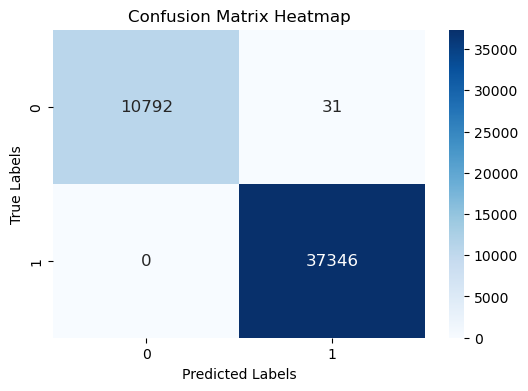

In [125]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Mendapatkan nilai True Positives (TP), True Negatives (TN), False Positives (FP), dan False Negatives (FN) dari confusion matrix
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Menampilkan nilai TP, TN, FP, dan FN
print("\nTrue Positives (TP) =", TP)
print("True Negatives (TN) =", TN)
print("False Positives (FP) =", FP)
print("False Negatives (FN) =", FN)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()



Berdasarkan hasil ini, dapat disimpulkan bahwa model XGBoost yang telah dilakukan hyperparameter tuning memiliki kinerja yang sangat baik dalam memprediksi risiko kredit. Model memiliki kemampuan yang tinggi untuk mengenali kredit beresiko (positif) dan kredit aman (negatif) dengan akurasi yang tinggi, serta memiliki tingkat kesalahan yang rendah dalam memprediksi kredit yang sebenarnya beresiko sebagai kredit aman atau sebaliknya. 

1. True Positives (TP) yang tinggi menunjukkan bahwa model berhasil memprediksi dengan benar sejumlah besar kredit yang beresiko (positif) sebagai kredit beresiko (positif). Dalam konteks evaluasi risiko kredit, hal ini mengindikasikan bahwa model memiliki kemampuan yang baik untuk mengidentifikasi kredit yang berpotensi menimbulkan risiko atau kemungkinan gagal bayar.


2. True Negatives (TN) yang cukup tinggi menunjukkan bahwa model juga berhasil memprediksi dengan benar sejumlah besar kredit yang aman (negatif) sebagai kredit aman (negatif). Artinya, model juga mampu mengenali kredit yang tidak berpotensi menimbulkan risiko dan cenderung aman.


3. False Positives (FP) yang rendah menunjukkan bahwa model memiliki tingkat kesalahan yang rendah dalam memprediksi kredit yang sebenarnya aman sebagai kredit beresiko. Hal ini sangat penting dalam evaluasi risiko kredit, karena pengidentifikasian kredit yang aman sebagai kredit beresiko dapat menyebabkan kerugian atau tindakan yang tidak perlu.


4. False Negatives (FN) yang bernilai nol menunjukkan bahwa tidak ada kredit yang secara salah diprediksi aman padahal seharusnya beresiko. Dalam evaluasi risiko kredit, ini merupakan hasil yang sangat diinginkan karena menghindari kredit beresiko yang seharusnya diidentifikasi sebagai aman dapat menyebabkan kerugian bagi institusi keuangan.

## ROC-AUC

ROC-AUC score on TRAIN data: 1.0000
ROC-AUC score on TEST data: 0.9999


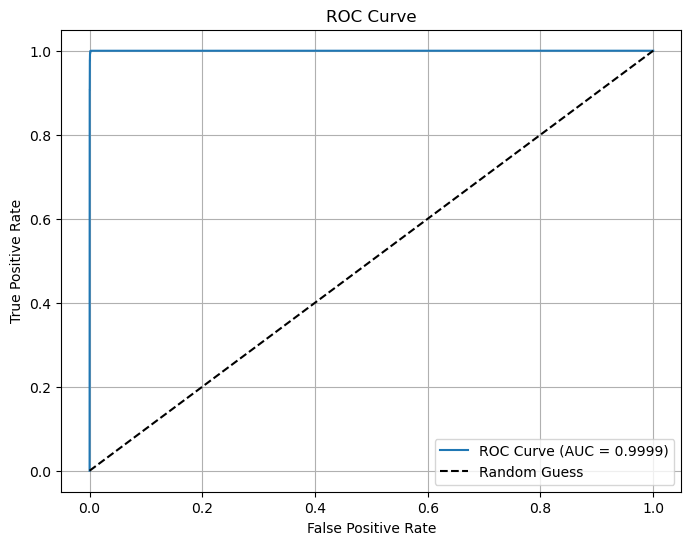

In [129]:
# Mendapatkan nilai probabilitas prediksi untuk kelas positif (y=1)
y_prob_train = best_xgb_model.predict_proba(x_train)[:, 1]
y_prob_test = best_xgb_model.predict_proba(x_test)[:, 1]

# Menghitung nilai ROC-AUC
roc_auc_train = roc_auc_score(y_train, y_prob_train)
roc_auc_test = roc_auc_score(y_test, y_prob_test)

# Menampilkan hasil
print("ROC-AUC score on TRAIN data: {:.4f}".format(roc_auc_train))
print("ROC-AUC score on TEST data: {:.4f}".format(roc_auc_test))

# Mendapatkan nilai false positive rate (fpr) dan true positive rate (tpr) untuk kurva ROC pada data test
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)

# Plot kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.4f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Model XGBoost yang telah di-tune dengan baik sangat efektif dalam memprediksi risiko kredit. Dengan nilai ROC-AUC yang sangat tinggi, model ini dapat membantu dalam mengidentifikasi pelanggan yang berisiko tinggi gagal membayar pinjaman, sehingga dapat membantu institusi keuangan mengambil keputusan yang lebih bijaksana dalam pemberian pinjaman. 

1. ROC-AUC Score pada Data TRAIN: 1.0000
    Nilai ROC-AUC sebesar 1.0000 menunjukkan bahwa model XGBoost yang telah di-tune dengan baik mampu membedakan sempurna antara kelas positif dan negatif pada data latih (TRAIN). Ini mengindikasikan bahwa model dengan sempurna dapat membedakan antara pelanggan yang membayar kembali pinjaman dan yang gagal membayar.


2. ROC-AUC Score pada Data TEST: 0.9999
    Nilai ROC-AUC yang mendekati 1.0000 pada data uji (TEST) menunjukkan bahwa model memiliki kinerja yang sangat baik dalam membedakan antara kelas positif dan negatif pada data yang belum pernah dilihat sebelumnya. Ini menunjukkan bahwa model yang dihasilkan memiliki generalisasi yang baik dan tidak mengalami overfitting.

## Feature Importance

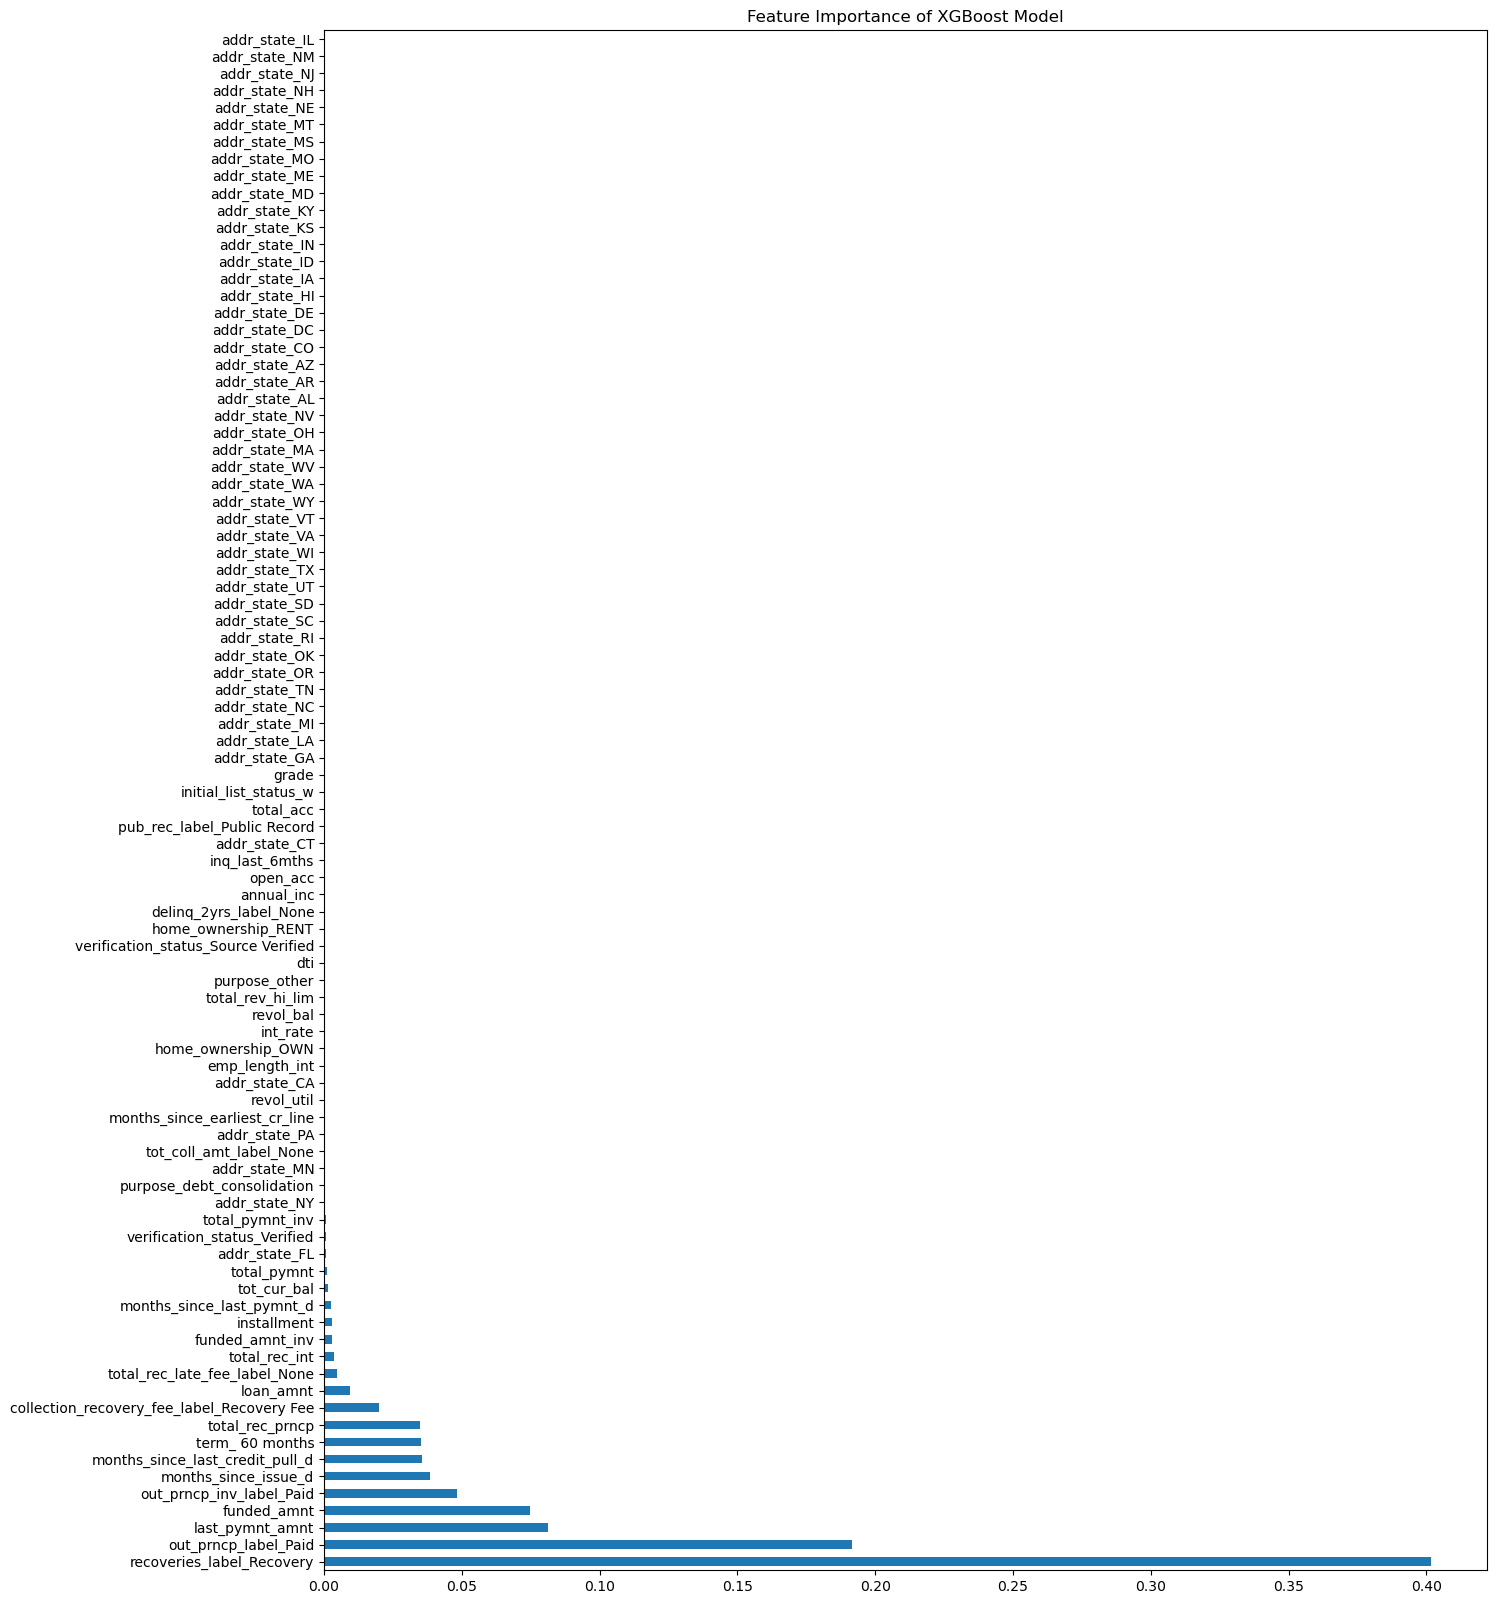

In [107]:
# Melatih model XGBoost dengan hyperparameter terbaik
xgb_model = XGBClassifier(colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.9)
xgb_model.fit(x_train, y_train)

# Menghitung feature importance dan membuat Series pandas
featimp_xgb = pd.Series(xgb_model.feature_importances_, index=x_train.columns).sort_values(ascending=False)

# Menampilkan grafik bar horizontal
plt.figure(figsize=(15, 20))
featimp_xgb.plot(kind='barh', title='Feature Importance of XGBoost Model')
plt.show()

Berikut adalah hasil berdasarkan feature importance yang telah disajikan:

1. 'recoveries_label_Recovery': Fitur ini memiliki tingkat pengaruh yang sangat tinggi dalam memprediksi risiko kredit. Hal ini menunjukkan bahwa jumlah recovery (pemulihan) yang berhasil dilakukan oleh lembaga keuangan atas kredit yang beresiko memiliki dampak yang signifikan dalam menilai risiko kredit.


2. 'out_prncp_label_Paid' dan 'out_prncp_inv_label_Paid': Fitur-fitur ini menunjukkan bahwa jumlah utang yang telah dibayarkan atau dilunasi oleh peminjam (paid off) merupakan faktor yang penting dalam menilai risiko kredit. Kredit yang telah lunas atau sudah dibayar dengan baik cenderung memiliki risiko yang lebih rendah.


3. 'last_pymnt_amnt': Jumlah pembayaran terakhir yang diterima memiliki pengaruh signifikan dalam memprediksi risiko kredit. Hal ini wajar karena peminjam yang dapat melakukan pembayaran terakhir dengan nilai yang tinggi menunjukkan kualitas kredit yang baik.


4. 'funded_amnt': Jumlah total pinjaman yang diberikan juga memiliki pengaruh yang signifikan dalam memprediksi risiko kredit. Semakin besar jumlah pinjaman, semakin besar risiko yang mungkin terkait dengan kredit tersebut.


5. 'months_since_issue_d' dan 'months_since_last_credit_pull_d': Fitur-fitur ini menunjukkan bahwa lamanya waktu sejak pinjaman diberikan dan lamanya waktu sejak riwayat kredit terakhir kali diperbarui juga berpengaruh dalam menilai risiko kredit. Semakin lama waktu ini, semakin tinggi risiko yang mungkin terkait dengan peminjam.


6. 'term_ 60 months': Jenis tenor pinjaman juga memiliki pengaruh penting. Tenor pinjaman 60 bulan (5 tahun) cenderung memiliki risiko lebih tinggi dibandingkan dengan tenor 36 bulan (3 tahun).


7. 'total_rec_prncp', 'total_rec_late_fee_label_None', 'total_rec_int', 'funded_amnt_inv', dan 'installment': Fitur-fitur ini juga memiliki pengaruh yang signifikan dalam memprediksi risiko kredit. Total pembayaran pokok, bunga, denda keterlambatan, serta jumlah pinjaman yang diberikan juga memiliki peran penting dalam penilaian risiko kredit.